# Dependencies

In [3]:
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import pandas_ta
import yfinance as yf
import warnings
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
warnings.filterwarnings('ignore')

# S&P500 Stocks List

In [4]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North Chicago, Illinois   
3                                   Biotechnology  North Chicago, Illinois   
4                  IT Consulting & Other Services          Dublin, Ireland   
..                                            ...                      ...   
498  Industrial Machinery & Supplies & Components   White Plains, New York   
499                                   Restaurants     Louisville, Kentucky   
500            Electronic Equipment & Instruments   Lincolnshire, Illinois   
501                         Health Care Equipment          Warsaw, Indiana   
502                               Pharmaceuticals   Parsippany, New Jersey   

     Date added      CIK      Founded  
0    1957-03-04    66740         1902  
1    2017-07-26    91142         1916  
2    1957-03-04     1800         1888  
3    2012-12-31  1551152  2013 (1888)  
4    2011-07-06  1467373         1989  
..          ...      ...          ...  
498  2011-11-01  1524472         2011  
499  1997-10-06  1041061         1997  
500  2019-12-23   877212         1969  
501  2001-08-07  1136869         1927  
502  2013-06-21  1555280         1952  

[503 rows x 8 columns]

In [5]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
s_list = sp500['Symbol'].unique().tolist()

s_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',

# Start and End Dates for training 

In [6]:
end_date = '2025-01-01'

start_date = pd.to_datetime(end_date) - pd.DateOffset(365*10)

print(end_date)
start_date

2025-01-01


Timestamp('2015-01-04 00:00:00')

# Downloading the data 

In [7]:
df = yf.download(tickers=s_list,
                   start=start_date,
                   end=end_date)

df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


Price            Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2015-01-05   36.575401   23.604330   41.956303         NaN   36.753006   
2015-01-06   36.005634   23.606554   41.748638         NaN   36.335625   
2015-01-07   36.483498   23.937572   43.435974         NaN   36.630245   
2015-01-08   37.577076   24.857306   43.890255         NaN   37.383137   
2015-01-09   37.301399   24.883970   42.689644         NaN   36.990337   
...                ...         ...         ...         ...         ...   
2024-12-24  135.560898  257.578674  176.685593  134.990005  113.634544   
2024-12-26  135.291977  258.396667  175.900314  135.320007  114.139534   
2024-12-27  135.003113  254.974930  174.732224  133.384995  113.862282   
2024-12-30  133.887543  251.593094  172.955551  131.809998  111.693764   
2024-12-31  134.055191  249.817383  174.427933  131.410004  112.000725   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2015-01-05  18.428413   73.363998   71.980003   43.874535  36.981152  ...   
2015-01-06  18.469618   72.834839   70.529999   42.844658  36.252125  ...   
2015-01-07  18.577387   74.363602   71.110001   43.295227  36.797058  ...   
2015-01-08  18.900694   75.497581   72.919998   44.059601  36.259491  ...   
2015-01-09  18.735870   75.413567   71.839996   44.027416  35.950203  ...   
...               ...         ...         ...         ...        ...  ...   
2024-12-24  92.669998  358.322815  447.940002  216.161057  49.560802  ...   
2024-12-26  92.930000  357.133789  450.160004  216.131317  49.541222  ...   
2024-12-27  92.339996  352.922638  446.480011  215.070786  49.511856  ...   
2024-12-30  91.889999  349.266388  445.799988  210.679977  49.012623  ...   
2024-12-31  92.349998  348.572815  444.679993  210.580856  49.453125  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2015-01-05  343789  2385400  1695100  3107200  18502400  1369900  4418651   
2015-01-06  347338  3405900  1975800  4749600  16670700  1333200  5004401   
2015-01-07  348357  2872700  1472000  2833400  13590700  1038600  4554134   
2015-01-08  343147  3004500  1676600  2516800  15487500   821800  4258268   
2015-01-09  307625  2022500  2210100  2328100  14488400   757000  3687263   
...            ...      ...      ...      ...       ...      ...      ...   
2024-12-24  191200  1780100   692800   943900   7807000   379300   533000   
2024-12-26  258700  1736500  1218900  1394900   9652400   575700  1040900   
2024-12-27  310700  2320500  1086700  2015000  11943900   552400  1146300   
2024-12-30  320300  2914700  2180100  2642900  11080800   586800  1144600   
2024-12-31  362700  3125200  1612600  2143800  12387800   641600  1217100   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2015-01-05  2223873  420300  3112100  
2015-01-06  1835563  527500  3977200  
2015-01-07  1505860  467800  2481800  
2015-01-08  1449004  324400  3121300  
2015-01-09  2187823  561300  2999100  
...             ...     ...      ...  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  
2024-12-31   683300  327900  1327400  

[2515 rows x 2515 columns]

In [8]:
df.stack()
df = df.stack()

In [9]:
df.index.names = ['date', 'ticker']
df

Price                   Close        High         Low        Open       Volume
date       ticker                                                             
2015-01-05 A        36.575401   37.181928   36.483505   37.053271    2041800.0
           AAPL     23.604330   24.137511   23.417718   24.057533  257142000.0
           ABBV     41.956303   42.897316   41.456591   42.507931    8007400.0
           ABT      36.753006   37.154009   36.523863   36.662985    5735900.0
           ACGL     18.428413   18.542522   18.384038   18.441093    1095900.0
...                       ...         ...         ...         ...          ...
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339     641600.0
           YUM     132.877213  133.501178  131.975910  132.807875    1217100.0
           ZBH     105.404167  106.272310  104.735601  105.683575     683300.0
           ZBRA    386.220001  387.410004  381.750000  383.420013     327900.0
           ZTS     161.892609  162.707395  160.839360  161.862801    1327400.0

[1226930 rows x 5 columns]

In [10]:
df.columns = df.columns.str.lower()
df

Price                   close        high         low        open       volume
date       ticker                                                             
2015-01-05 A        36.575401   37.181928   36.483505   37.053271    2041800.0
           AAPL     23.604330   24.137511   23.417718   24.057533  257142000.0
           ABBV     41.956303   42.897316   41.456591   42.507931    8007400.0
           ABT      36.753006   37.154009   36.523863   36.662985    5735900.0
           ACGL     18.428413   18.542522   18.384038   18.441093    1095900.0
...                       ...         ...         ...         ...          ...
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339     641600.0
           YUM     132.877213  133.501178  131.975910  132.807875    1217100.0
           ZBH     105.404167  106.272310  104.735601  105.683575     683300.0
           ZBRA    386.220001  387.410004  381.750000  383.420013     327900.0
           ZTS     161.892609  162.707395  160.839360  161.862801    1327400.0

[1226930 rows x 5 columns]

# Calculating Garman Klass

In [11]:
df['garman_klass'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2*np.log(2) - 1) * ((np.log(df['close']) - np.log(df['open']))**2)
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass  
date       ticker                             
2015-01-05 A         2041800.0      0.000115  
           AAPL    257142000.0      0.000319  
           ABBV      8007400.0      0.000518  
           ABT       5735900.0      0.000144  
           ACGL      1095900.0      0.000037  
...                        ...           ...  
2024-12-31 XYL        641600.0      0.000071  
           YUM       1217100.0      0.000066  
           ZBH        683300.0      0.000103  
           ZBRA       327900.0      0.000088  
           ZTS       1327400.0      0.000067  

[1226930 rows x 6 columns]

# Calculating RSI 

In [12]:
df['rsi'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.rsi(close = x, length = 20))
df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass        rsi  
date       ticker                                        
2015-01-05 A         2041800.0      0.000115        NaN  
           AAPL    257142000.0      0.000319        NaN  
           ABBV      8007400.0      0.000518        NaN  
           ABT       5735900.0      0.000144        NaN  
           ACGL      1095900.0      0.000037        NaN  
...                        ...           ...        ...  
2024-12-31 XYL        641600.0      0.000071  34.976419  
           YUM       1217100.0      0.000066  47.898464  
           ZBH        683300.0      0.000103  44.205722  
           ZBRA       327900.0      0.000088  46.600495  
           ZTS       1327400.0      0.000067  34.077583  

[1226930 rows x 7 columns]

<Axes: xlabel='date'>

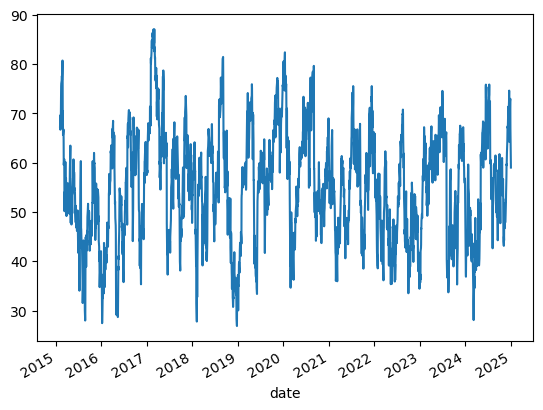

In [13]:
#Example of Apple Stock
df.xs('AAPL', level=1)['rsi'].plot()

In [14]:
pandas_ta.bbands(close=df.xs('AAPL', level=1)['close'], length=20)

BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
date                                                                  
2015-01-05         NaN         NaN         NaN         NaN         NaN
2015-01-06         NaN         NaN         NaN         NaN         NaN
2015-01-07         NaN         NaN         NaN         NaN         NaN
2015-01-08         NaN         NaN         NaN         NaN         NaN
2015-01-09         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2024-12-24  232.966263  245.700803  258.435342   10.365892    0.966364
2024-12-26  234.106266  246.895920  259.685573   10.360360    0.949611
2024-12-27  236.053146  247.926434  259.799721    9.578073    0.796822
2024-12-30  237.873680  248.668144  259.462608    8.681823    0.635484
2024-12-31  239.360772  249.208342  259.055912    7.903082    0.530923

[2515 rows x 5 columns]

In [15]:
df['bb_low'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,0])

df['bb_mid'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,1])

df['bb_high'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length = 20).iloc[:,2])

df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                             
2015-01-05 A         2041800.0      0.000115        NaN       NaN       NaN   
           AAPL    257142000.0      0.000319        NaN       NaN       NaN   
           ABBV      8007400.0      0.000518        NaN       NaN       NaN   
           ABT       5735900.0      0.000144        NaN       NaN       NaN   
           ACGL      1095900.0      0.000037        NaN       NaN       NaN   
...                        ...           ...        ...       ...       ...   
2024-12-31 XYL        641600.0      0.000071  34.976419  4.726247  4.799889   
           YUM       1217100.0      0.000066  47.898464  4.871477  4.908393   
           ZBH        683300.0      0.000103  44.205722  4.655654  4.682476   
           ZBRA       327900.0      0.000088  46.600495  5.942514  5.989551   
           ZTS       1327400.0      0.000067  34.077583  5.068102  5.140142   

Price               bb_high  
date       ticker            
2015-01-05 A            NaN  
           AAPL         NaN  
           ABBV         NaN  
           ABT          NaN  
           ACGL         NaN  
...                     ...  
2024-12-31 XYL     4.873531  
           YUM     4.945308  
           ZBH     4.709297  
           ZBRA    6.036588  
           ZTS     5.212182  

[1226930 rows x 10 columns]

# Computing ATR

In [16]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14
                       )
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                             
2015-01-05 A         2041800.0      0.000115        NaN       NaN       NaN   
           AAPL    257142000.0      0.000319        NaN       NaN       NaN   
           ABBV      8007400.0      0.000518        NaN       NaN       NaN   
           ABT       5735900.0      0.000144        NaN       NaN       NaN   
           ACGL      1095900.0      0.000037        NaN       NaN       NaN   
...                        ...           ...        ...       ...       ...   
2024-12-31 XYL        641600.0      0.000071  34.976419  4.726247  4.799889   
           YUM       1217100.0      0.000066  47.898464  4.871477  4.908393   
           ZBH        683300.0      0.000103  44.205722  4.655654  4.682476   
           ZBRA       327900.0      0.000088  46.600495  5.942514  5.989551   
           ZTS       1327400.0      0.000067  34.077583  5.068102  5.140142   

Price               bb_high       atr  
date       ticker                      
2015-01-05 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2024-12-31 XYL     4.873531  0.737122  
           YUM     4.945308  0.907746  
           ZBH     4.709297 -0.504752  
           ZBRA    6.036588  0.297797  
           ZTS     5.212182  0.578565  

[1226930 rows x 11 columns]

# Computing MACD 

In [17]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:, 0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['close'].apply(compute_macd)

df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                             
2015-01-05 A         2041800.0      0.000115        NaN       NaN       NaN   
           AAPL    257142000.0      0.000319        NaN       NaN       NaN   
           ABBV      8007400.0      0.000518        NaN       NaN       NaN   
           ABT       5735900.0      0.000144        NaN       NaN       NaN   
           ACGL      1095900.0      0.000037        NaN       NaN       NaN   
...                        ...           ...        ...       ...       ...   
2024-12-31 XYL        641600.0      0.000071  34.976419  4.726247  4.799889   
           YUM       1217100.0      0.000066  47.898464  4.871477  4.908393   
           ZBH        683300.0      0.000103  44.205722  4.655654  4.682476   
           ZBRA       327900.0      0.000088  46.600495  5.942514  5.989551   
           ZTS       1327400.0      0.000067  34.077583  5.068102  5.140142   

Price               bb_high       atr      macd  
date       ticker                                
2015-01-05 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
...                     ...       ...       ...  
2024-12-31 XYL     4.873531  0.737122 -1.783577  
           YUM     4.945308  0.907746 -0.550677  
           ZBH     4.709297 -0.504752 -0.334357  
           ZBRA    6.036588  0.297797 -0.402535  
           ZTS     5.212182  0.578565 -1.954352  

[1226930 rows x 12 columns]

# Calculating volume of each stock

In [18]:
df['dollar_volume'] = (df['close'] * df['volume']) / 1e6

df

Price                   close        high         low        open  \
date       ticker                                                   
2015-01-05 A        36.575401   37.181928   36.483505   37.053271   
           AAPL     23.604330   24.137511   23.417718   24.057533   
           ABBV     41.956303   42.897316   41.456591   42.507931   
           ABT      36.753006   37.154009   36.523863   36.662985   
           ACGL     18.428413   18.542522   18.384038   18.441093   
...                       ...         ...         ...         ...   
2024-12-31 XYL     115.293098  116.376273  114.845921  116.048339   
           YUM     132.877213  133.501178  131.975910  132.807875   
           ZBH     105.404167  106.272310  104.735601  105.683575   
           ZBRA    386.220001  387.410004  381.750000  383.420013   
           ZTS     161.892609  162.707395  160.839360  161.862801   

Price                   volume  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                             
2015-01-05 A         2041800.0      0.000115        NaN       NaN       NaN   
           AAPL    257142000.0      0.000319        NaN       NaN       NaN   
           ABBV      8007400.0      0.000518        NaN       NaN       NaN   
           ABT       5735900.0      0.000144        NaN       NaN       NaN   
           ACGL      1095900.0      0.000037        NaN       NaN       NaN   
...                        ...           ...        ...       ...       ...   
2024-12-31 XYL        641600.0      0.000071  34.976419  4.726247  4.799889   
           YUM       1217100.0      0.000066  47.898464  4.871477  4.908393   
           ZBH        683300.0      0.000103  44.205722  4.655654  4.682476   
           ZBRA       327900.0      0.000088  46.600495  5.942514  5.989551   
           ZTS       1327400.0      0.000067  34.077583  5.068102  5.140142   

Price               bb_high       atr      macd  dollar_volume  
date       ticker                                               
2015-01-05 A            NaN       NaN       NaN      74.679654  
           AAPL         NaN       NaN       NaN    6069.664641  
           ABBV         NaN       NaN       NaN     335.960898  
           ABT          NaN       NaN       NaN     210.811567  
           ACGL         NaN       NaN       NaN      20.195698  
...                     ...       ...       ...            ...  
2024-12-31 XYL     4.873531  0.737122 -1.783577      73.972052  
           YUM     4.945308  0.907746 -0.550677     161.724855  
           ZBH     4.709297 -0.504752 -0.334357      72.022667  
           ZBRA    6.036588  0.297797 -0.402535     126.641538  
           ZTS     5.212182  0.578565 -1.954352     214.896249  

[1226930 rows x 13 columns]

In [19]:
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date       ticker               
2015-01-31 A           97.184392
           AAPL      6511.917976
           ABBV       355.660544
           ABT        217.264791
           ACGL        26.121082
...                          ...
2024-12-31 XYL        160.744519
           YUM        204.737631
           ZBH        160.679449
           ZBRA       121.307398
           ZTS        404.846222

[58551 rows x 1 columns]

In [20]:
last_col = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low']]

last_col

['close', 'garman_klass', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd']

In [21]:
df.unstack()[last_col].resample('M').last().stack('ticker')

Price                   close  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                            
2015-01-31 A        34.709854      0.000113        NaN       NaN       NaN   
           AAPL     26.028082      0.000311        NaN       NaN       NaN   
           ABBV     39.459728      0.000557        NaN       NaN       NaN   
           ABT      36.824127      0.000134        NaN       NaN       NaN   
           ACGL     18.374529      0.000077        NaN       NaN       NaN   
...                       ...           ...        ...       ...       ...   
2024-12-31 XYL     115.293098      0.000071  34.976419  4.726247  4.799889   
           YUM     132.877213      0.000066  47.898464  4.871477  4.908393   
           ZBH     105.404167      0.000103  44.205722  4.655654  4.682476   
           ZBRA    386.220001      0.000088  46.600495  5.942514  5.989551   
           ZTS     161.892609      0.000067  34.077583  5.068102  5.140142   

Price               bb_high       atr      macd  
date       ticker                                
2015-01-31 A            NaN -0.998001       NaN  
           AAPL         NaN -0.845344       NaN  
           ABBV         NaN -0.708732       NaN  
           ABT          NaN -0.923248       NaN  
           ACGL         NaN -1.014393       NaN  
...                     ...       ...       ...  
2024-12-31 XYL     4.873531  0.737122 -1.783577  
           YUM     4.945308  0.907746 -0.550677  
           ZBH     4.709297 -0.504752 -0.334357  
           ZBRA    6.036588  0.297797 -0.402535  
           ZTS     5.212182  0.578565 -1.954352  

[58551 rows x 8 columns]

In [22]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), 
          df.unstack()[last_col].resample('M').last().stack('ticker')],
         axis=1)).dropna()

data

dollar_volume       close  garman_klass        rsi  \
date       ticker                                                       
2015-02-28 A          102.870263   38.790150      0.000025  62.945118   
           AAPL      6712.875118   28.651104      0.000107  65.634559   
           ABBV       520.677118   39.557812      0.000052  48.684511   
           ABT        225.293309   38.971394      0.000055  63.106484   
           ACGL        24.453041   18.751719      0.000020  48.968389   
...                          ...         ...           ...        ...   
2024-12-31 XYL        160.744519  115.293098      0.000071  34.976419   
           YUM        204.737631  132.877213      0.000066  47.898464   
           ZBH        160.679449  105.404167      0.000103  44.205722   
           ZBRA       121.307398  386.220001      0.000088  46.600495   
           ZTS        404.846222  161.892609      0.000067  34.077583   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-02-28 A       3.574849  3.640369  3.705888 -1.177553  0.283924  
           AAPL    3.282025  3.361759  3.441493 -0.969904  0.263335  
           ABBV    3.617033  3.677789  3.738546 -1.025727 -0.516402  
           ABT     3.617671  3.661333  3.704995 -1.143862  0.381427  
           ACGL    2.970974  2.990333  3.009693 -1.108927 -0.246196  
...                     ...       ...       ...       ...       ...  
2024-12-31 XYL     4.726247  4.799889  4.873531  0.737122 -1.783577  
           YUM     4.871477  4.908393  4.945308  0.907746 -0.550677  
           ZBH     4.655654  4.682476  4.709297 -0.504752 -0.334357  
           ZBRA    5.942514  5.989551  6.036588  0.297797 -0.402535  
           ZTS     5.068102  5.140142  5.212182  0.578565 -1.954352  

[58044 rows x 9 columns]

# 5 year rolling average

In [23]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data

dollar_volume       close  garman_klass        rsi  \
date       ticker                                                       
2015-02-28 A                 NaN   38.790150      0.000025  62.945118   
           AAPL              NaN   28.651104      0.000107  65.634559   
           ABBV              NaN   39.557812      0.000052  48.684511   
           ABT               NaN   38.971394      0.000055  63.106484   
           ACGL              NaN   18.751719      0.000020  48.968389   
...                          ...         ...           ...        ...   
2024-12-31 XYL        121.846210  115.293098      0.000071  34.976419   
           YUM        200.032726  132.877213      0.000066  47.898464   
           ZBH        178.009576  105.404167      0.000103  44.205722   
           ZBRA       124.840513  386.220001      0.000088  46.600495   
           ZTS        343.347798  161.892609      0.000067  34.077583   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-02-28 A       3.574849  3.640369  3.705888 -1.177553  0.283924  
           AAPL    3.282025  3.361759  3.441493 -0.969904  0.263335  
           ABBV    3.617033  3.677789  3.738546 -1.025727 -0.516402  
           ABT     3.617671  3.661333  3.704995 -1.143862  0.381427  
           ACGL    2.970974  2.990333  3.009693 -1.108927 -0.246196  
...                     ...       ...       ...       ...       ...  
2024-12-31 XYL     4.726247  4.799889  4.873531  0.737122 -1.783577  
           YUM     4.871477  4.908393  4.945308  0.907746 -0.550677  
           ZBH     4.655654  4.682476  4.709297 -0.504752 -0.334357  
           ZBRA    5.942514  5.989551  6.036588  0.297797 -0.402535  
           ZTS     5.068102  5.140142  5.212182  0.578565 -1.954352  

[58044 rows x 9 columns]

In [24]:
data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data

dollar_volume       close  garman_klass        rsi  \
date       ticker                                                       
2015-02-28 A                 NaN   38.790150      0.000025  62.945118   
           AAPL              NaN   28.651104      0.000107  65.634559   
           ABBV              NaN   39.557812      0.000052  48.684511   
           ABT               NaN   38.971394      0.000055  63.106484   
           ACGL              NaN   18.751719      0.000020  48.968389   
...                          ...         ...           ...        ...   
2024-12-31 XYL        121.846210  115.293098      0.000071  34.976419   
           YUM        200.032726  132.877213      0.000066  47.898464   
           ZBH        178.009576  105.404167      0.000103  44.205722   
           ZBRA       124.840513  386.220001      0.000088  46.600495   
           ZTS        343.347798  161.892609      0.000067  34.077583   

                     bb_low    bb_mid   bb_high       atr      macd  \
date       ticker                                                     
2015-02-28 A       3.574849  3.640369  3.705888 -1.177553  0.283924   
           AAPL    3.282025  3.361759  3.441493 -0.969904  0.263335   
           ABBV    3.617033  3.677789  3.738546 -1.025727 -0.516402   
           ABT     3.617671  3.661333  3.704995 -1.143862  0.381427   
           ACGL    2.970974  2.990333  3.009693 -1.108927 -0.246196   
...                     ...       ...       ...       ...       ...   
2024-12-31 XYL     4.726247  4.799889  4.873531  0.737122 -1.783577   
           YUM     4.871477  4.908393  4.945308  0.907746 -0.550677   
           ZBH     4.655654  4.682476  4.709297 -0.504752 -0.334357   
           ZBRA    5.942514  5.989551  6.036588  0.297797 -0.402535   
           ZTS     5.068102  5.140142  5.212182  0.578565 -1.954352   

                   dollar_vol_rank  
date       ticker                   
2015-02-28 A                   NaN  
           AAPL                NaN  
           ABBV                NaN  
           ABT                 NaN  
           ACGL                NaN  
...                            ...  
2024-12-31 XYL               395.0  
           YUM               267.0  
           ZBH               294.0  
           ZBRA              387.0  
           ZTS               151.0  

[58044 rows x 10 columns]

In [25]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

close  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                            
2016-01-31 AAPL     21.993353      0.000214  41.477731  3.088483  3.148709   
           ABBV     37.185616      0.000316  45.787355  3.597359  3.666101   
           ABT      31.832006      0.000135  35.617645  3.479833  3.559019   
           ACN      90.562515      0.000100  54.939458  4.437206  4.475651   
           ADBE     89.129997      0.000410  49.039436  4.449317  4.499281   
...                       ...           ...        ...       ...       ...   
2024-12-31 VZ       38.672569      0.000043  38.074976  3.648743  3.708441   
           WDAY    258.029999      0.000278  46.917931  5.552833  5.598519   
           WFC      69.513557      0.000068  49.517631  4.230842  4.272490   
           WMT      89.885246      0.000045  50.924168  4.508084  4.541688   
           XOM     105.643356      0.000131  35.592926  4.622929  4.688257   

                    bb_high       atr      macd  
date       ticker                                
2016-01-31 AAPL    3.208934 -0.873966 -0.636903  
           ABBV    3.734843 -0.324334 -0.231791  
           ABT     3.638204 -0.562372 -1.215283  
           ACN     4.514096 -0.787162 -0.266364  
           ADBE    4.549245 -1.029950 -0.297526  
...                     ...       ...       ...  
2024-12-31 VZ      3.768139 -0.018110 -1.719141  
           WDAY    5.644205  1.361400  0.077619  
           WFC     4.314138  1.698786 -0.338559  
           WMT     4.575291  3.171154  0.777958  
           XOM     4.753586  0.589440 -2.592369  

[16092 rows x 8 columns]

In [26]:
x = df.xs('AAPL', level=1)

x

Price            close        high         low        open       volume  \
date                                                                      
2015-01-05   23.604330   24.137511   23.417718   24.057533  257142000.0   
2015-01-06   23.606554   23.866479   23.244435   23.668758  263188400.0   
2015-01-07   23.937572   24.037543   23.704305   23.815385  160423600.0   
2015-01-08   24.857306   24.915067   24.148620   24.266365  237458000.0   
2015-01-09   24.883970   25.159446   24.484084   25.030594  214798000.0   
...                ...         ...         ...         ...          ...   
2024-12-24  257.578674  257.588630  254.675658  254.875189   23234700.0   
2024-12-26  258.396667  259.474086  257.010028  257.568678   27237100.0   
2024-12-27  254.974930  258.077462  252.451019  257.209530   42355300.0   
2024-12-30  251.593094  252.889969  250.146586  251.623020   35557500.0   
2024-12-31  249.817383  252.670501  248.829760  251.832526   39480700.0   

Price       garman_klass        rsi    bb_low    bb_mid   bb_high       atr  \
date                                                                          
2015-01-05      0.000319        NaN       NaN       NaN       NaN       NaN   
2015-01-06      0.000346        NaN       NaN       NaN       NaN       NaN   
2015-01-07      0.000087        NaN       NaN       NaN       NaN       NaN   
2015-01-08      0.000265        NaN       NaN       NaN       NaN       NaN   
2015-01-09      0.000357        NaN       NaN       NaN       NaN       NaN   
...                  ...        ...       ...       ...       ...       ...   
2024-12-24      0.000022  72.409431  5.456119  5.507842  5.559566  1.194603   
2024-12-26      0.000042  72.976190  5.461041  5.512676  5.564311  1.124171   
2024-12-27      0.000214  66.922979  5.469182  5.516873  5.564564  1.214634   
2024-12-30      0.000059  61.606621  5.476701  5.519899  5.563097  1.248615   
2024-12-31      0.000092  59.015423  5.482808  5.522101  5.561394  1.235957   

Price           macd  dollar_volume  
date                                 
2015-01-05       NaN    6069.664641  
2015-01-06       NaN    6212.971185  
2015-01-07       NaN    3840.151552  
2015-01-08       NaN    5902.566056  
2015-01-09       NaN    5345.027044  
...              ...            ...  
2024-12-24  2.622482    5984.763224  
2024-12-26  2.734387    7037.975872  
2024-12-27  2.656093   10799.539645  
2024-12-30  2.431207    8946.021435  
2024-12-31  2.155731    9862.965146  

[2515 rows x 13 columns]

In [27]:
def cal_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for leg in lags:
        df[f'return_{leg}m'] = (df['close']
                              .pct_change(leg)
                              .pipe(lambda a: a.clip(lower=a.quantile(outlier_cutoff), 
                                                    upper=a.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/leg)
                              .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(cal_returns).dropna()

data

close  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                            
2017-01-31 AAPL     28.028297      0.000019  67.547781  3.325405  3.353906   
           ABBV     42.974434      0.000209  49.245687  3.761620  3.792813   
           ABT      36.018276      0.000172  66.811051  3.548355  3.581633   
           ACN      99.685394      0.000077  41.080218  4.613044  4.628016   
           ADBE    113.379997      0.000042  65.319514  4.650383  4.706909   
...                       ...           ...        ...       ...       ...   
2024-12-31 VZ       38.672569      0.000043  38.074976  3.648743  3.708441   
           WDAY    258.029999      0.000278  46.917931  5.552833  5.598519   
           WFC      69.513557      0.000068  49.517631  4.230842  4.272490   
           WMT      89.885246      0.000045  50.924168  4.508084  4.541688   
           XOM     105.643356      0.000131  35.592926  4.622929  4.688257   

                    bb_high       atr      macd  return_1m  return_2m  \
date       ticker                                                       
2017-01-31 AAPL    3.382406 -1.158978 -0.114670   0.047747   0.047851   
           ABBV    3.824005 -1.192085 -0.302744  -0.014267   0.007591   
           ABT     3.614911 -1.146275  0.227036   0.094502   0.050846   
           ACN     4.642987 -1.005386 -0.422642  -0.027832  -0.023555   
           ADBE    4.763434 -1.216330  0.124432   0.101311   0.050148   
...                     ...       ...       ...        ...        ...   
2024-12-31 VZ      3.768139 -0.018110 -1.719141  -0.098106  -0.025729   
           WDAY    5.644205  1.361400  0.077619   0.032161   0.050428   
           WFC     4.314138  1.698786 -0.338559  -0.077852   0.043159   
           WMT     4.575291  3.171154  0.777958  -0.021079   0.051163   
           XOM     4.753586  0.589440 -2.592369  -0.088081  -0.036308   

                   return_3m  return_6m  return_9m  return_12m  
date       ticker                                               
2017-01-31 AAPL     0.024169   0.027504   0.030998    0.020412  
           ABBV     0.034343  -0.010155   0.003312    0.012130  
           ABT      0.023240  -0.009313   0.010061    0.010349  
           ACN     -0.006843   0.003289   0.002083    0.008030  
           ADBE     0.017878   0.024838   0.020781    0.020257  
...                      ...        ...        ...         ...  
2024-12-31 VZ      -0.032958   0.000157  -0.000033    0.010343  
           WDAY     0.018241   0.024187  -0.006145   -0.005613  
           WFC      0.077381   0.030652   0.023750    0.032320  
           WMT      0.038920   0.050136   0.047194    0.047235  
           XOM     -0.025576  -0.008568  -0.005896    0.008933  

[13754 rows x 14 columns]

# FAMA FRENCH FACTOR

In [28]:
web.DataReader('F-F_Research_Data_5_Factors_2x3',
              'famafrench', 
              start='2010')[0]

Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2010-01   -3.35  0.40  0.33 -1.08  0.51  0.00
2010-02    3.39  1.49  3.18 -0.29  1.42  0.00
2010-03    6.30  1.83  2.19 -0.61  1.74  0.01
2010-04    2.00  4.96  2.96  0.61  1.75  0.01
2010-05   -7.90  0.08 -2.48  1.30 -0.24  0.01
...         ...   ...   ...   ...   ...   ...
2024-12   -3.15 -3.84 -3.00  1.91 -1.21  0.37
2025-01    2.80 -1.22  1.62 -2.33 -3.24  0.37
2025-02   -2.43 -4.93  4.91  1.09  3.06  0.33
2025-03   -6.39 -1.49  2.90  2.11 -0.47  0.34
2025-04   -0.85 -1.85 -3.41 -2.84 -2.67  0.35

[184 rows x 6 columns]

In [29]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
              'famafrench', 
              start='2010')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()

factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.35  0.40  0.33 -1.08  0.51
2010-02-01    3.39  1.49  3.18 -0.29  1.42
2010-03-01    6.30  1.83  2.19 -0.61  1.74
2010-04-01    2.00  4.96  2.96  0.61  1.75
2010-05-01   -7.90  0.08 -2.48  1.30 -0.24
...            ...   ...   ...   ...   ...
2024-12-01   -3.15 -3.84 -3.00  1.91 -1.21
2025-01-01    2.80 -1.22  1.62 -2.33 -3.24
2025-02-01   -2.43 -4.93  4.91  1.09  3.06
2025-03-01   -6.39 -1.49  2.90  2.11 -0.47
2025-04-01   -0.85 -1.85 -3.41 -2.84 -2.67

[184 rows x 5 columns]

In [30]:
factor_data = factor_data.resample('M').last().div(100)

factor_data.index.name = 'date'

factor_data

Mkt-RF     SMB     HML     RMW     CMA
date                                              
2010-01-31 -0.0335  0.0040  0.0033 -0.0108  0.0051
2010-02-28  0.0339  0.0149  0.0318 -0.0029  0.0142
2010-03-31  0.0630  0.0183  0.0219 -0.0061  0.0174
2010-04-30  0.0200  0.0496  0.0296  0.0061  0.0175
2010-05-31 -0.0790  0.0008 -0.0248  0.0130 -0.0024
...            ...     ...     ...     ...     ...
2024-12-31 -0.0315 -0.0384 -0.0300  0.0191 -0.0121
2025-01-31  0.0280 -0.0122  0.0162 -0.0233 -0.0324
2025-02-28 -0.0243 -0.0493  0.0491  0.0109  0.0306
2025-03-31 -0.0639 -0.0149  0.0290  0.0211 -0.0047
2025-04-30 -0.0085 -0.0185 -0.0341 -0.0284 -0.0267

[184 rows x 5 columns]

In [31]:
factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-01-31 AAPL    0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.047747
           ABBV    0.0194 -0.0144 -0.0276 -0.0051 -0.0106  -0.014267
           ABT     0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.094502
           ACN     0.0194 -0.0144 -0.0276 -0.0051 -0.0106  -0.027832
           ADBE    0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.101311
...                   ...     ...     ...     ...     ...        ...
2024-12-31 VZ     -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.098106
           WDAY   -0.0315 -0.0384 -0.0300  0.0191 -0.0121   0.032161
           WFC    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.077852
           WMT    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.021079
           XOM    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.088081

[13754 rows x 6 columns]

In [32]:
factor_data.xs('AAPL', level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2017-01-31  0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.047747
2017-02-28  0.0355 -0.0230 -0.0150  0.0045 -0.0180   0.133778
2017-03-31  0.0017  0.0075 -0.0333  0.0063 -0.0095   0.048690
2017-04-30  0.0108  0.0041 -0.0205  0.0179 -0.0160  -0.000070
2017-05-31  0.0107 -0.0299 -0.0382  0.0099 -0.0166   0.067808

In [33]:
factor_data.xs('MSFT', level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2017-01-31  0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.040393
2017-02-28  0.0355 -0.0230 -0.0150  0.0045 -0.0180  -0.004364
2017-03-31  0.0017  0.0075 -0.0333  0.0063 -0.0095   0.029384
2017-04-30  0.0108  0.0041 -0.0205  0.0179 -0.0160   0.039477
2017-05-31  0.0107 -0.0299 -0.0382  0.0099 -0.0166   0.026005

In [34]:
factor_data.groupby(level=1).size()

ticker
AAPL    96
ABBV    96
ABNB    25
ABT     96
ACN     96
        ..
WMB      5
WMT     96
WYNN    78
XOM     96
YUM     24
Length: 187, dtype: int64

## Filtering stocks which have more than 10 mon of data

In [35]:
obs = factor_data.groupby(level=1).size()

valid_stocks = obs[obs >= 10]

valid_stocks

ticker
AAPL    96
ABBV    96
ABNB    25
ABT     96
ACN     96
        ..
WFC     96
WMT     96
WYNN    78
XOM     96
YUM     24
Length: 179, dtype: int64

In [36]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-01-31 AAPL    0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.047747
           ABBV    0.0194 -0.0144 -0.0276 -0.0051 -0.0106  -0.014267
           ABT     0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.094502
           ACN     0.0194 -0.0144 -0.0276 -0.0051 -0.0106  -0.027832
           ADBE    0.0194 -0.0144 -0.0276 -0.0051 -0.0106   0.101311
...                   ...     ...     ...     ...     ...        ...
2024-12-31 VZ     -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.098106
           WDAY   -0.0315 -0.0384 -0.0300  0.0191 -0.0121   0.032161
           WFC    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.077852
           WMT    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.021079
           XOM    -0.0315 -0.0384 -0.0300  0.0191 -0.0121  -0.088081

[13722 rows x 6 columns]

In [37]:
betas = (factor_data.groupby(level=1, 
                             group_keys=False)
                    .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)), 
                                     window=min(24, x.shape[0]), 
                                     min_nobs=len(x.columns)+1)
                    .fit(params_only=True)
                    .params 
                    .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-01-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-12-31 VZ      1.208714 -0.872317  0.806446  0.654719 -0.496075
           WDAY    0.965153 -1.345667  0.579329 -2.402811 -1.650670
           WFC     0.471858 -0.009845  0.987989 -2.186168 -0.232729
           WMT     0.740662  0.313583 -0.510507  1.190108  0.714743
           XOM     0.670249  0.059481  0.231953  1.152220  0.804147

[13722 rows x 5 columns]

In [38]:
data = (data.join(betas.groupby('ticker').shift()))
data

close  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                            
2017-01-31 AAPL     28.028297      0.000019  67.547781  3.325405  3.353906   
           ABBV     42.974434      0.000209  49.245687  3.761620  3.792813   
           ABT      36.018276      0.000172  66.811051  3.548355  3.581633   
           ACN      99.685394      0.000077  41.080218  4.613044  4.628016   
           ADBE    113.379997      0.000042  65.319514  4.650383  4.706909   
...                       ...           ...        ...       ...       ...   
2024-12-31 VZ       38.672569      0.000043  38.074976  3.648743  3.708441   
           WDAY    258.029999      0.000278  46.917931  5.552833  5.598519   
           WFC      69.513557      0.000068  49.517631  4.230842  4.272490   
           WMT      89.885246      0.000045  50.924168  4.508084  4.541688   
           XOM     105.643356      0.000131  35.592926  4.622929  4.688257   

                    bb_high       atr      macd  return_1m  return_2m  \
date       ticker                                                       
2017-01-31 AAPL    3.382406 -1.158978 -0.114670   0.047747   0.047851   
           ABBV    3.824005 -1.192085 -0.302744  -0.014267   0.007591   
           ABT     3.614911 -1.146275  0.227036   0.094502   0.050846   
           ACN     4.642987 -1.005386 -0.422642  -0.027832  -0.023555   
           ADBE    4.763434 -1.216330  0.124432   0.101311   0.050148   
...                     ...       ...       ...        ...        ...   
2024-12-31 VZ      3.768139 -0.018110 -1.719141  -0.098106  -0.025729   
           WDAY    5.644205  1.361400  0.077619   0.032161   0.050428   
           WFC     4.314138  1.698786 -0.338559  -0.077852   0.043159   
           WMT     4.575291  3.171154  0.777958  -0.021079   0.051163   
           XOM     4.753586  0.589440 -2.592369  -0.088081  -0.036308   

                   return_3m  return_6m  return_9m  return_12m    Mkt-RF  \
date       ticker                                                          
2017-01-31 AAPL     0.024169   0.027504   0.030998    0.020412       NaN   
           ABBV     0.034343  -0.010155   0.003312    0.012130       NaN   
           ABT      0.023240  -0.009313   0.010061    0.010349       NaN   
           ACN     -0.006843   0.003289   0.002083    0.008030       NaN   
           ADBE     0.017878   0.024838   0.020781    0.020257       NaN   
...                      ...        ...        ...         ...       ...   
2024-12-31 VZ      -0.032958   0.000157  -0.000033    0.010343  0.879403   
           WDAY     0.018241   0.024187  -0.006145   -0.005613  0.748708   
           WFC      0.077381   0.030652   0.023750    0.032320  0.743810   
           WMT      0.038920   0.050136   0.047194    0.047235  0.842176   
           XOM     -0.025576  -0.008568  -0.005896    0.008933  0.603304   

                        SMB       HML       RMW       CMA  
date       ticker                                          
2017-01-31 AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACN          NaN       NaN       NaN       NaN  
           ADBE         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-12-31 VZ     -0.627367  0.342034  0.498913  0.241400  
           WDAY   -1.040967  0.135075 -2.621489 -0.757472  
           WFC    -0.332511  1.487961 -1.960098 -1.183937  
           WMT     0.161749 -0.293513  1.299893  0.270449  
           XOM     0.033808  0.210549  1.181609  0.739545  

[13754 rows x 19 columns]

In [39]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

data

close  garman_klass        rsi    bb_low    bb_mid  \
date       ticker                                                            
2017-01-31 AAPL     28.028297      0.000019  67.547781  3.325405  3.353906   
           ABBV     42.974434      0.000209  49.245687  3.761620  3.792813   
           ABT      36.018276      0.000172  66.811051  3.548355  3.581633   
           ACN      99.685394      0.000077  41.080218  4.613044  4.628016   
           ADBE    113.379997      0.000042  65.319514  4.650383  4.706909   
...                       ...           ...        ...       ...       ...   
2024-12-31 VZ       38.672569      0.000043  38.074976  3.648743  3.708441   
           WDAY    258.029999      0.000278  46.917931  5.552833  5.598519   
           WFC      69.513557      0.000068  49.517631  4.230842  4.272490   
           WMT      89.885246      0.000045  50.924168  4.508084  4.541688   
           XOM     105.643356      0.000131  35.592926  4.622929  4.688257   

                    bb_high       atr      macd  return_1m  return_2m  \
date       ticker                                                       
2017-01-31 AAPL    3.382406 -1.158978 -0.114670   0.047747   0.047851   
           ABBV    3.824005 -1.192085 -0.302744  -0.014267   0.007591   
           ABT     3.614911 -1.146275  0.227036   0.094502   0.050846   
           ACN     4.642987 -1.005386 -0.422642  -0.027832  -0.023555   
           ADBE    4.763434 -1.216330  0.124432   0.101311   0.050148   
...                     ...       ...       ...        ...        ...   
2024-12-31 VZ      3.768139 -0.018110 -1.719141  -0.098106  -0.025729   
           WDAY    5.644205  1.361400  0.077619   0.032161   0.050428   
           WFC     4.314138  1.698786 -0.338559  -0.077852   0.043159   
           WMT     4.575291  3.171154  0.777958  -0.021079   0.051163   
           XOM     4.753586  0.589440 -2.592369  -0.088081  -0.036308   

                   return_3m  return_6m  return_9m  return_12m    Mkt-RF  \
date       ticker                                                          
2017-01-31 AAPL     0.024169   0.027504   0.030998    0.020412  1.161875   
           ABBV     0.034343  -0.010155   0.003312    0.012130  0.521409   
           ABT      0.023240  -0.009313   0.010061    0.010349  0.830648   
           ACN     -0.006843   0.003289   0.002083    0.008030  1.169852   
           ADBE     0.017878   0.024838   0.020781    0.020257  1.158395   
...                      ...        ...        ...         ...       ...   
2024-12-31 VZ      -0.032958   0.000157  -0.000033    0.010343  0.879403   
           WDAY     0.018241   0.024187  -0.006145   -0.005613  0.748708   
           WFC      0.077381   0.030652   0.023750    0.032320  0.743810   
           WMT      0.038920   0.050136   0.047194    0.047235  0.842176   
           XOM     -0.025576  -0.008568  -0.005896    0.008933  0.603304   

                        SMB       HML       RMW       CMA  
date       ticker                                          
2017-01-31 AAPL   -0.129929 -0.610151  0.610248  0.003654  
           ABBV    0.121887  0.077342 -0.145360  0.183476  
           ABT    -0.181045 -0.474214  0.097109  0.979774  
           ACN    -0.176592 -0.288541  0.167483  0.068066  
           ADBE   -0.414237 -0.138100 -0.198399 -0.820309  
...                     ...       ...       ...       ...  
2024-12-31 VZ     -0.627367  0.342034  0.498913  0.241400  
           WDAY   -1.040967  0.135075 -2.621489 -0.757472  
           WFC    -0.332511  1.487961 -1.960098 -1.183937  
           WMT     0.161749 -0.293513  1.299893  0.270449  
           XOM     0.033808  0.210549  1.181609  0.739545  

[13754 rows x 19 columns]

In [43]:
data = data.drop('close', axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13546 entries, (Timestamp('2017-01-31 00:00:00'), 'AAPL') to (Timestamp('2024-12-31 00:00:00'), 'XOM')
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   garman_klass  13546 non-null  float64
 1   rsi           13546 non-null  float64
 2   bb_low        13546 non-null  float64
 3   bb_mid        13546 non-null  float64
 4   bb_high       13546 non-null  float64
 5   atr           13546 non-null  float64
 6   macd          13546 non-null  float64
 7   return_1m     13546 non-null  float64
 8   return_2m     13546 non-null  float64
 9   return_3m     13546 non-null  float64
 10  return_6m     13546 non-null  float64
 11  return_9m     13546 non-null  float64
 12  return_12m    13546 non-null  float64
 13  Mkt-RF        13546 non-null  float64
 14  SMB           13546 non-null  float64
 15  HML           13546 non-null  float64
 16  RMW           13546 non-null  float

# For each Month fit a K-Means Clustering Algo 

In [48]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)

def get_cluster(df):
    
    df['cluster'] = KMeans(n_clusters=4, 
                           random_state=0, 
                           init=initial_centroids).fit(df).labels_
    return df 

data = data.dropna().groupby('date', group_keys=False).apply(get_cluster)

data

garman_klass        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                          
2017-01-31 AAPL        0.000019  67.547781  3.325405  3.353906  3.382406   
           ABBV        0.000209  49.245687  3.761620  3.792813  3.824005   
           ABT         0.000172  66.811051  3.548355  3.581633  3.614911   
           ACN         0.000077  41.080218  4.613044  4.628016  4.642987   
           ADBE        0.000042  65.319514  4.650383  4.706909  4.763434   
...                         ...        ...       ...       ...       ...   
2024-12-31 VZ          0.000043  38.074976  3.648743  3.708441  3.768139   
           WDAY        0.000278  46.917931  5.552833  5.598519  5.644205   
           WFC         0.000068  49.517631  4.230842  4.272490  4.314138   
           WMT         0.000045  50.924168  4.508084  4.541688  4.575291   
           XOM         0.000131  35.592926  4.622929  4.688257  4.753586   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-01-31 AAPL   -1.158978 -0.114670   0.047747   0.047851   0.024169   
           ABBV   -1.192085 -0.302744  -0.014267   0.007591   0.034343   
           ABT    -1.146275  0.227036   0.094502   0.050846   0.023240   
           ACN    -1.005386 -0.422642  -0.027832  -0.023555  -0.006843   
           ADBE   -1.216330  0.124432   0.101311   0.050148   0.017878   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.018110 -1.719141  -0.098106  -0.025729  -0.032958   
           WDAY    1.361400  0.077619   0.032161   0.050428   0.018241   
           WFC     1.698786 -0.338559  -0.077852   0.043159   0.077381   
           WMT     3.171154  0.777958  -0.021079   0.051163   0.038920   
           XOM     0.589440 -2.592369  -0.088081  -0.036308  -0.025576   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-01-31 AAPL     0.027504   0.030998    0.020412  1.161875 -0.129929   
           ABBV    -0.010155   0.003312    0.012130  0.521409  0.121887   
           ABT     -0.009313   0.010061    0.010349  0.830648 -0.181045   
           ACN      0.003289   0.002083    0.008030  1.169852 -0.176592   
           ADBE     0.024838   0.020781    0.020257  1.158395 -0.414237   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000157  -0.000033    0.010343  0.879403 -0.627367   
           WDAY     0.024187  -0.006145   -0.005613  0.748708 -1.040967   
           WFC      0.030652   0.023750    0.032320  0.743810 -0.332511   
           WMT      0.050136   0.047194    0.047235  0.842176  0.161749   
           XOM     -0.008568  -0.005896    0.008933  0.603304  0.033808   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-01-31 AAPL   -0.610151  0.610248  0.003654        3  
           ABBV    0.077342 -0.145360  0.183476        1  
           ABT    -0.474214  0.097109  0.979774        3  
           ACN    -0.288541  0.167483  0.068066        0  
           ADBE   -0.138100 -0.198399 -0.820309        3  
...                     ...       ...       ...      ...  
2024-12-31 VZ      0.342034  0.498913  0.241400        0  
           WDAY    0.135075 -2.621489 -0.757472        2  
           WFC     1.487961 -1.960098 -1.183937        2  
           WMT    -0.293513  1.299893  0.270449        2  
           XOM     0.210549  1.181609  0.739545        0  

[13546 rows x 19 columns]

In [49]:
# 5 = atr    1 = rsi

def plot_cluster(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
   # cluster_4 = data[data['cluster']==4] 

    plt.scatter(cluster_0.iloc[:, 5], cluster_0.iloc[:, 1], color='red', label='cluster_0')
    plt.scatter(cluster_1.iloc[:, 5], cluster_1.iloc[:, 1], color='green', label='cluster_1')
    plt.scatter(cluster_2.iloc[:, 5], cluster_2.iloc[:, 1], color='blue', label='cluster_2')
    plt.scatter(cluster_3.iloc[:, 5], cluster_3.iloc[:, 1], color='black', label='cluster_3')
   # plt.scatter(cluster_4.iloc[:, 6], cluster_4.iloc[:, 2], color='pink', label='cluster_4')

    plt.legend()
    plt.show()
    return 

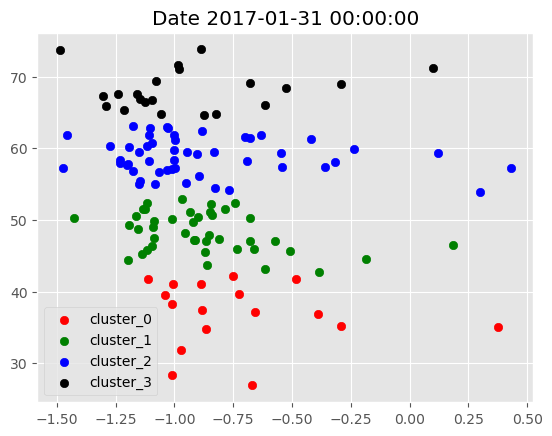

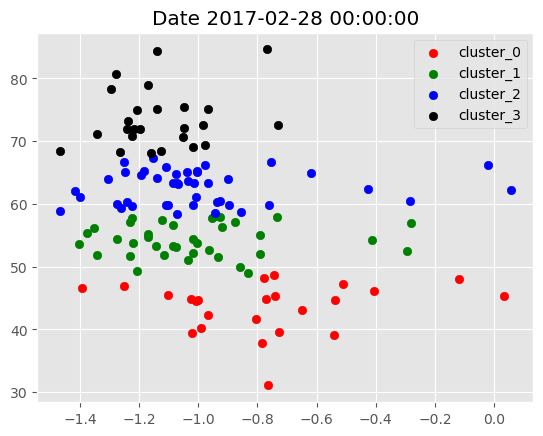

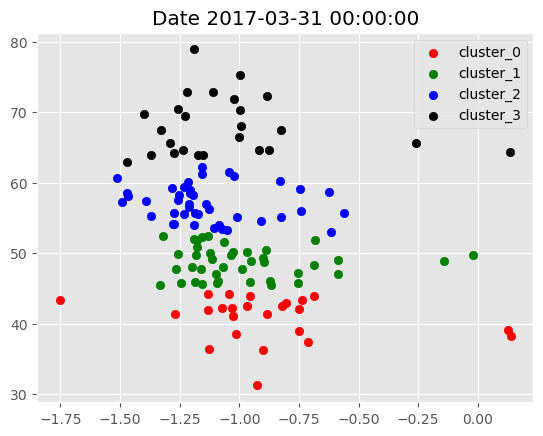

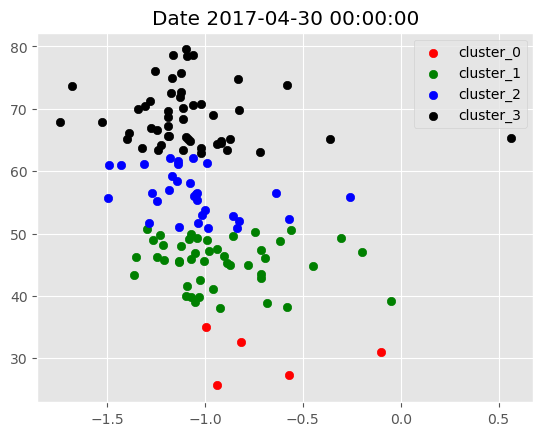

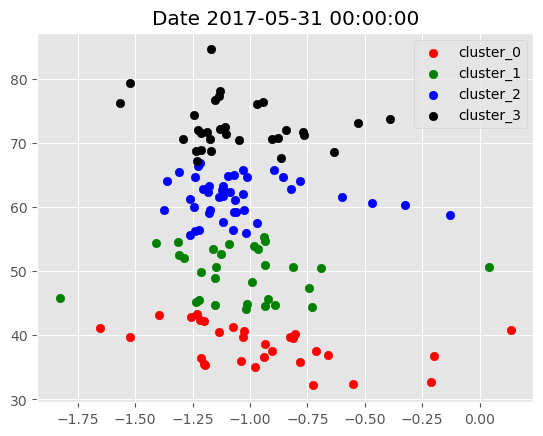

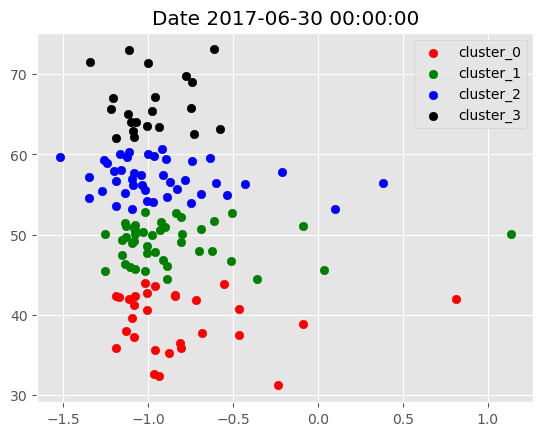

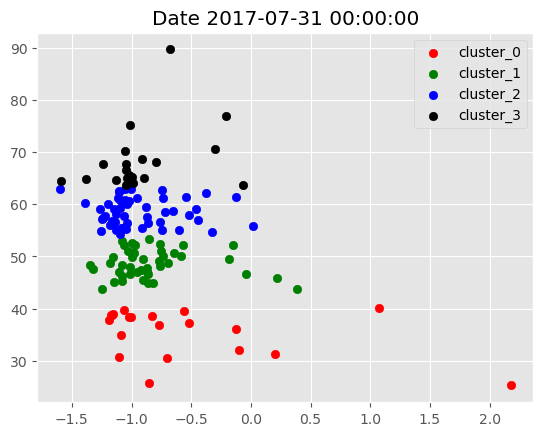

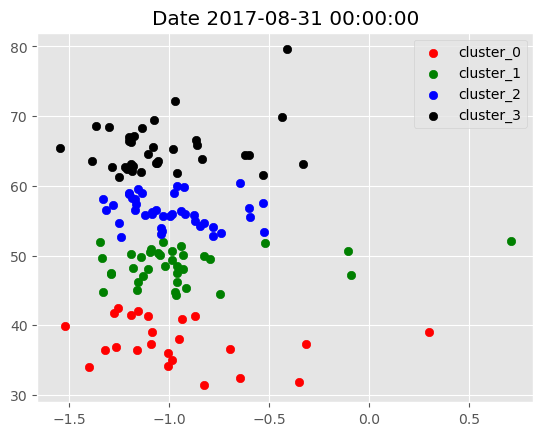

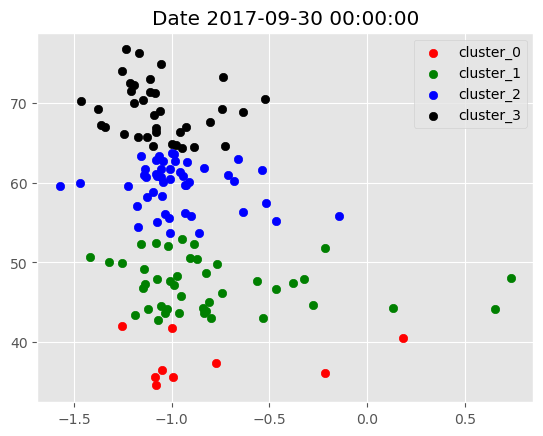

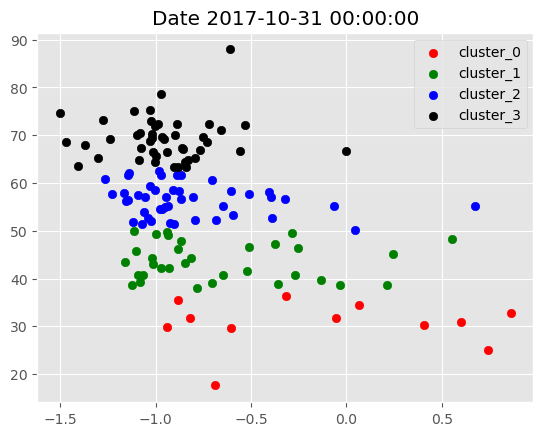

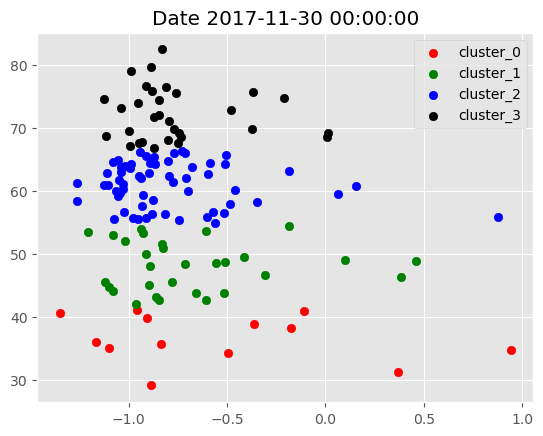

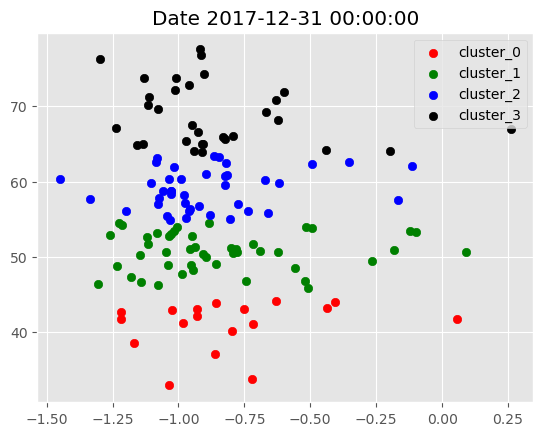

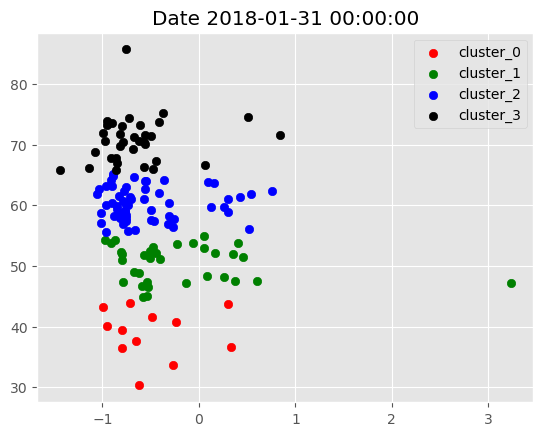

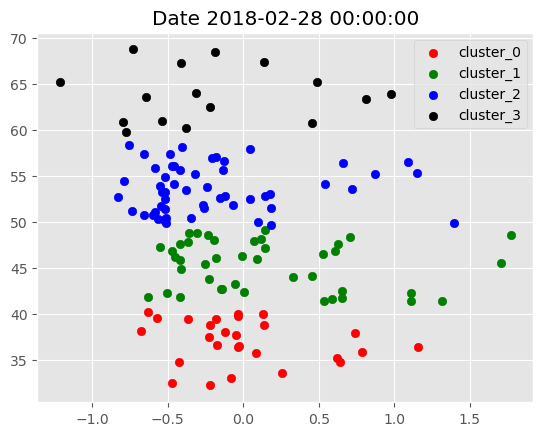

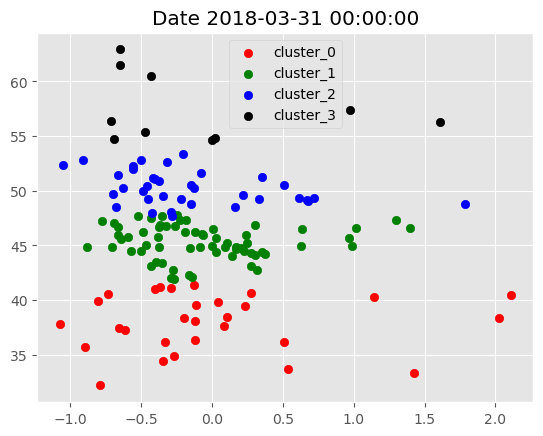

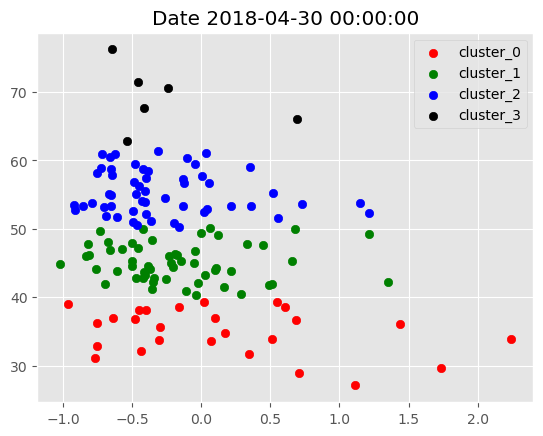

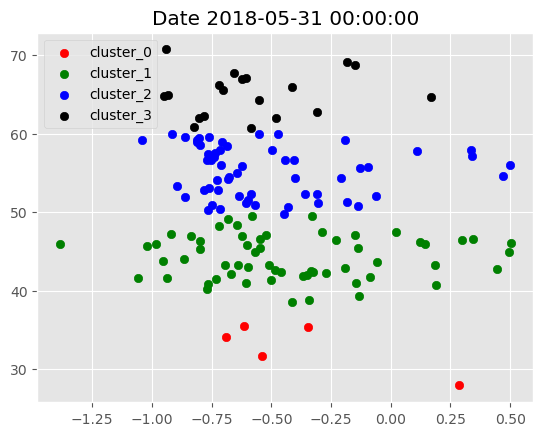

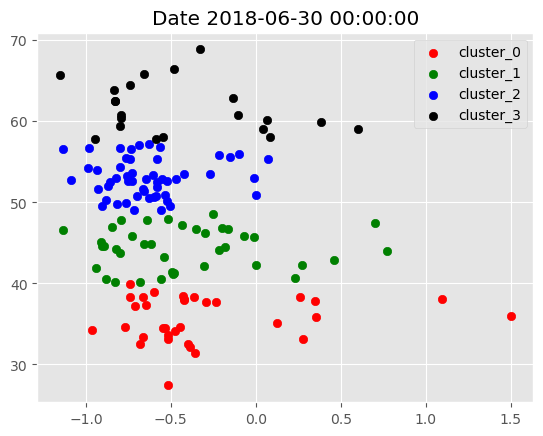

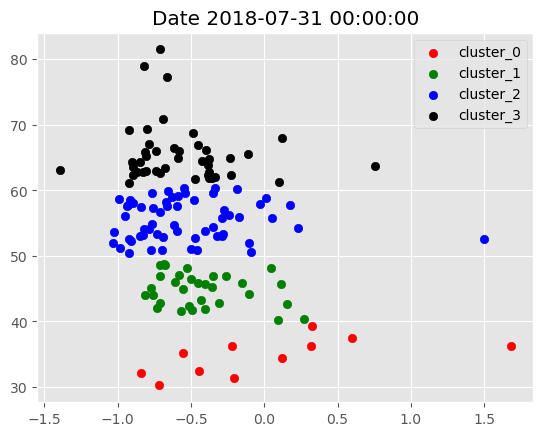

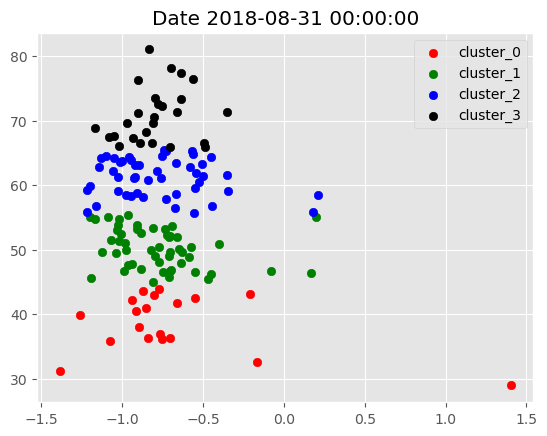

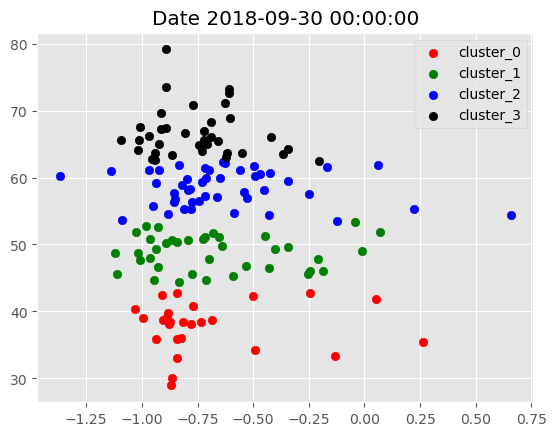

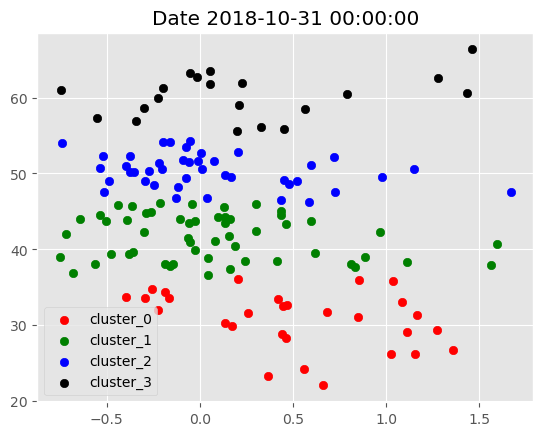

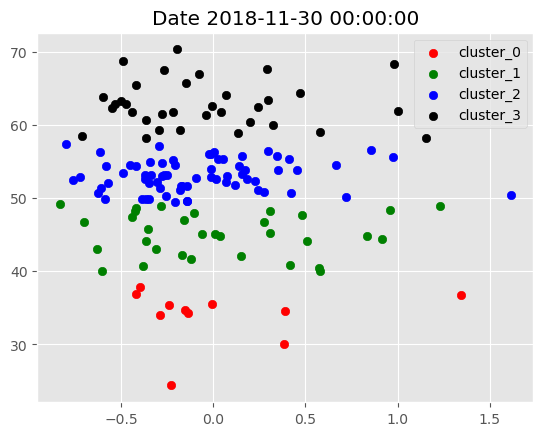

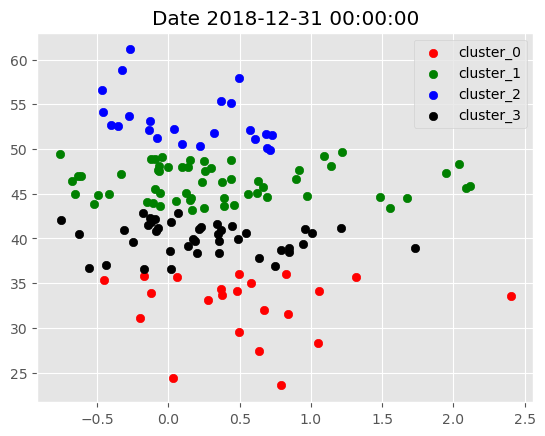

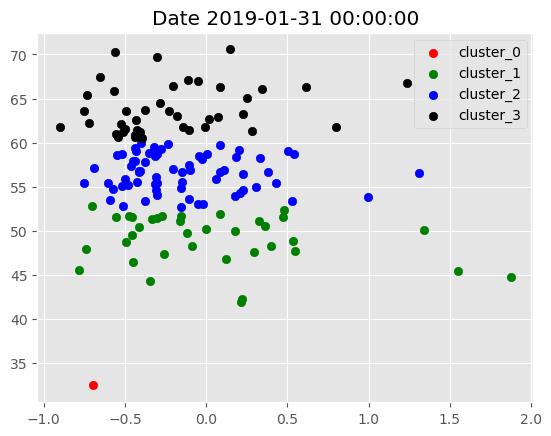

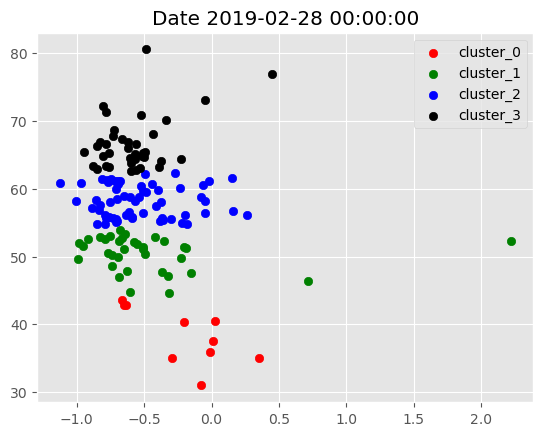

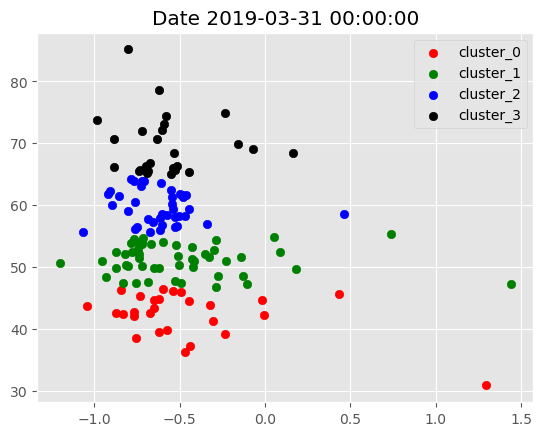

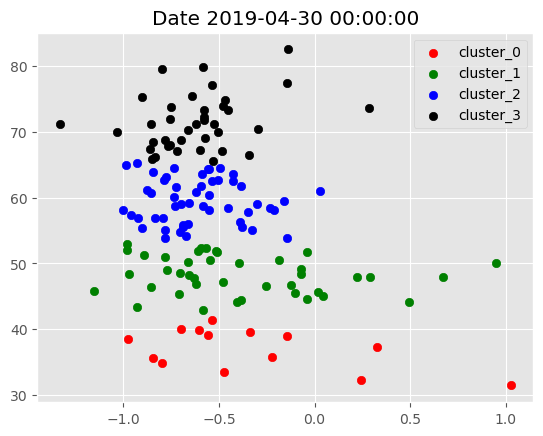

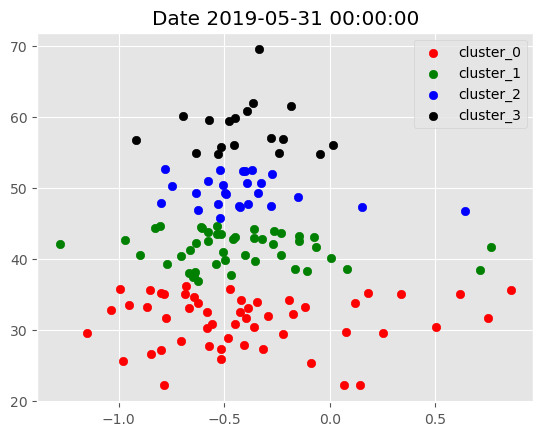

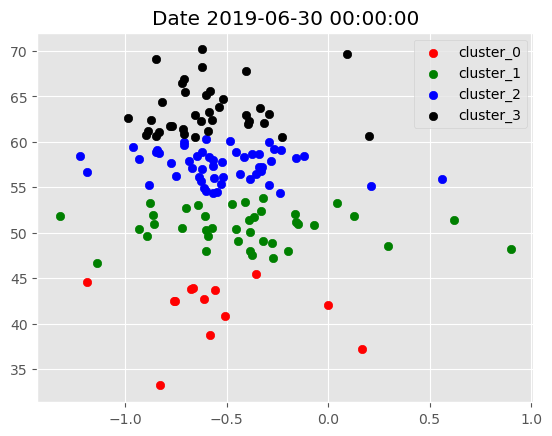

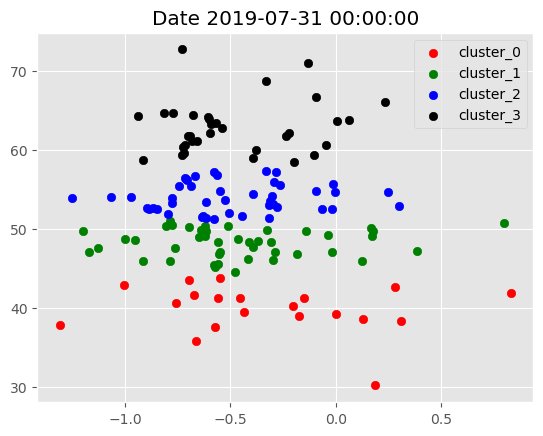

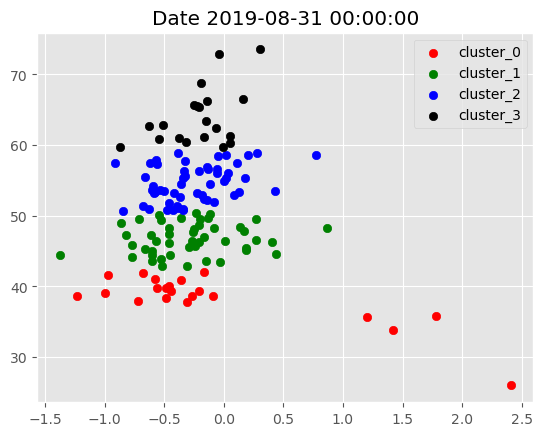

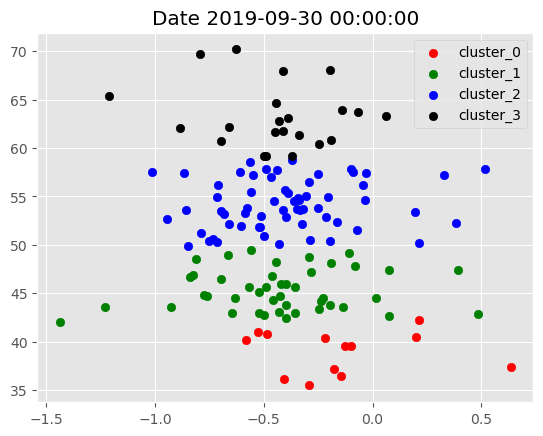

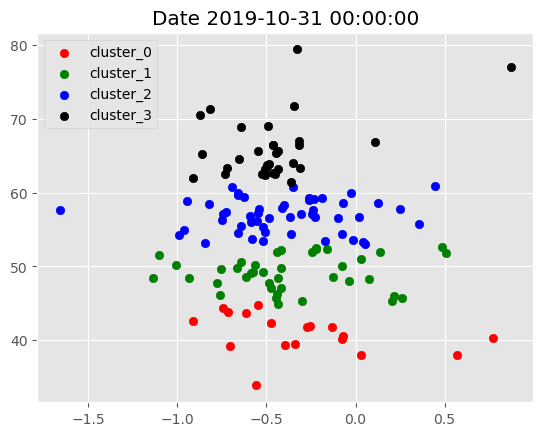

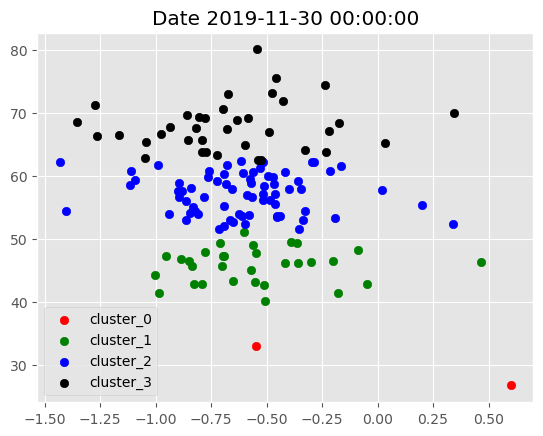

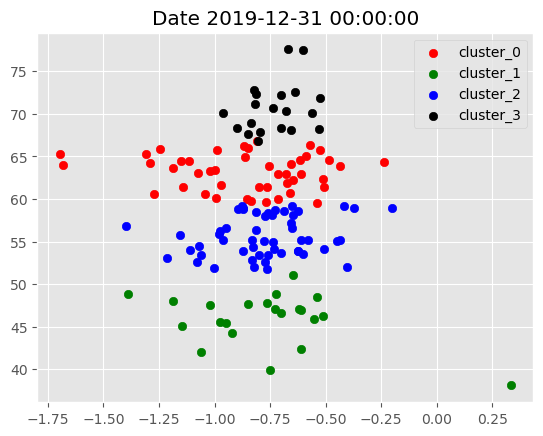

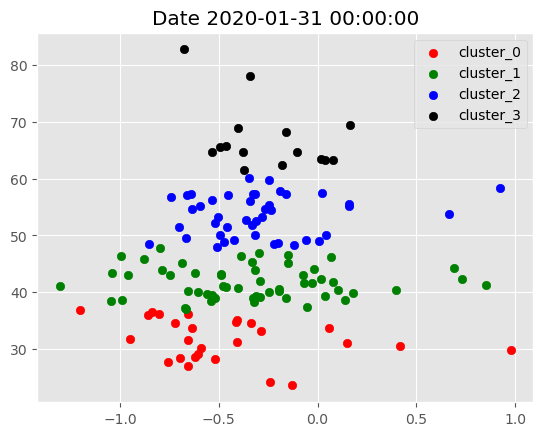

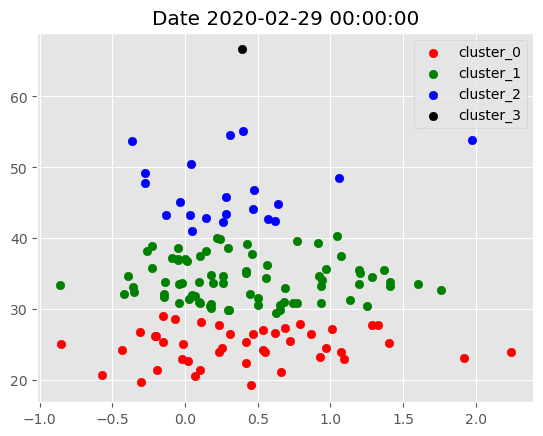

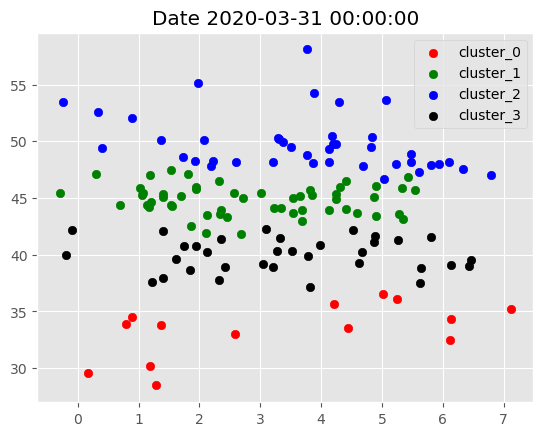

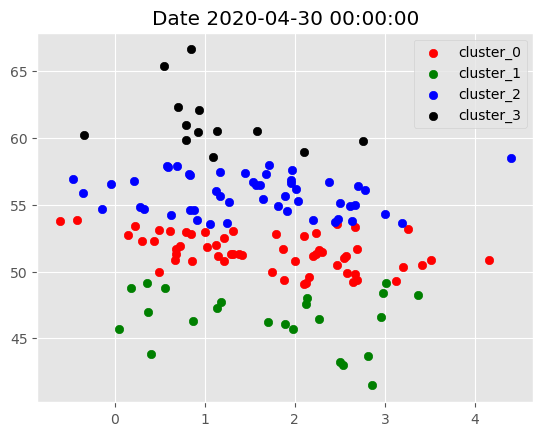

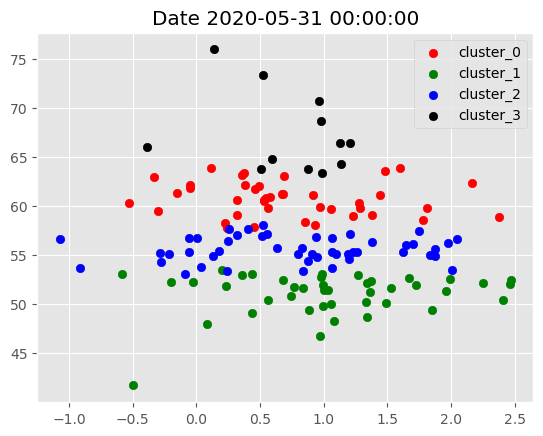

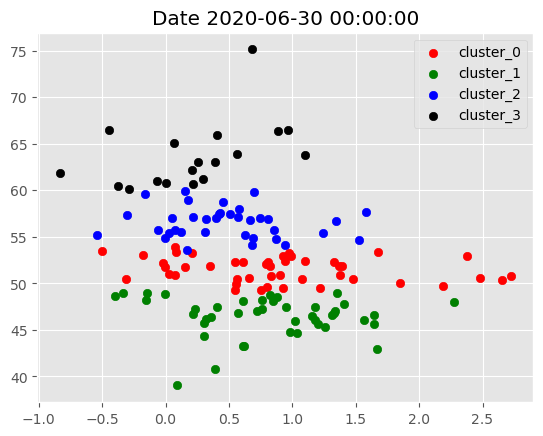

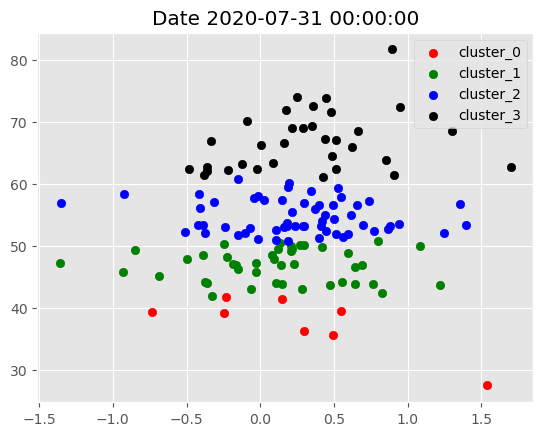

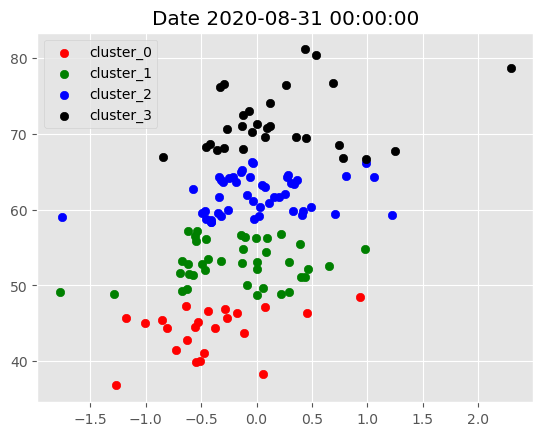

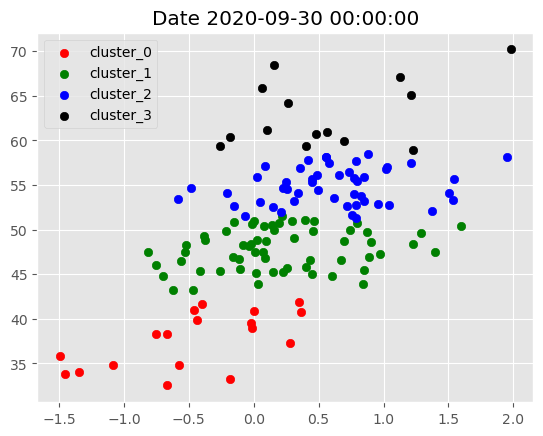

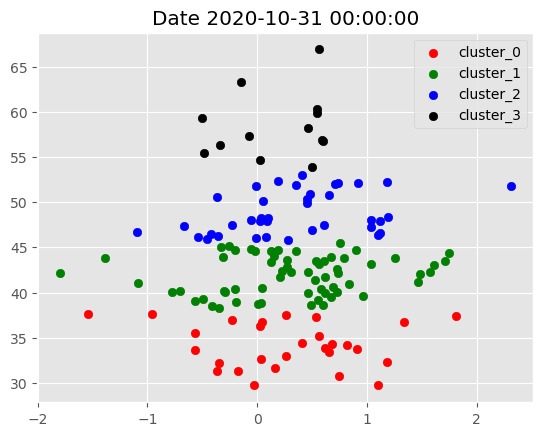

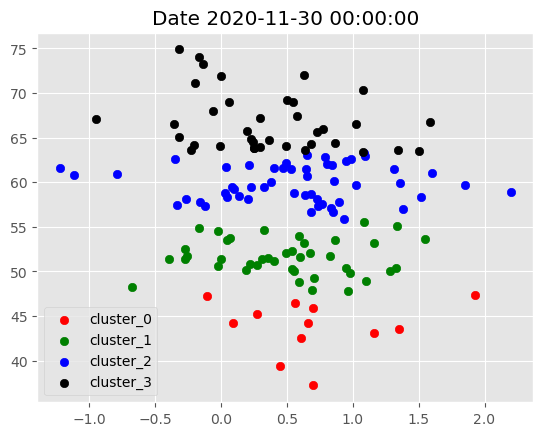

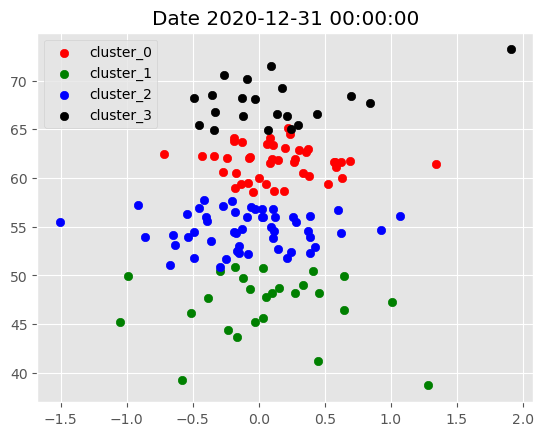

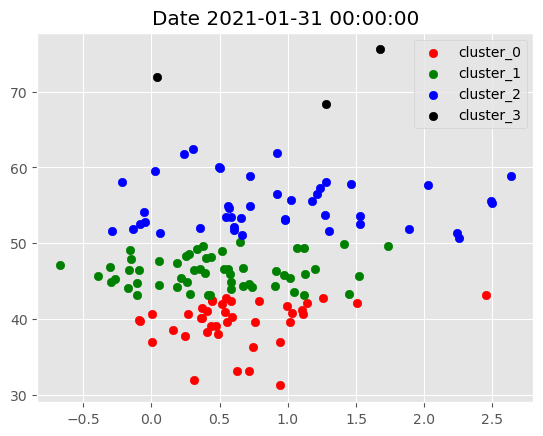

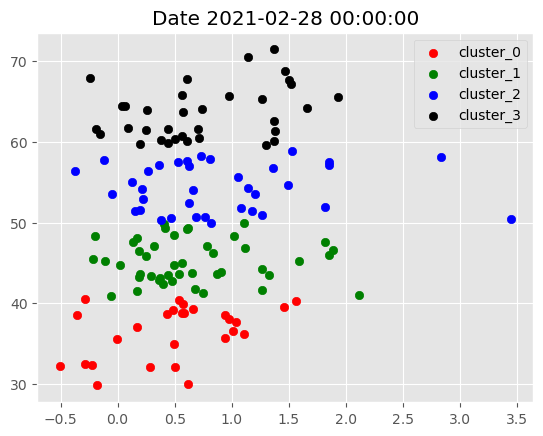

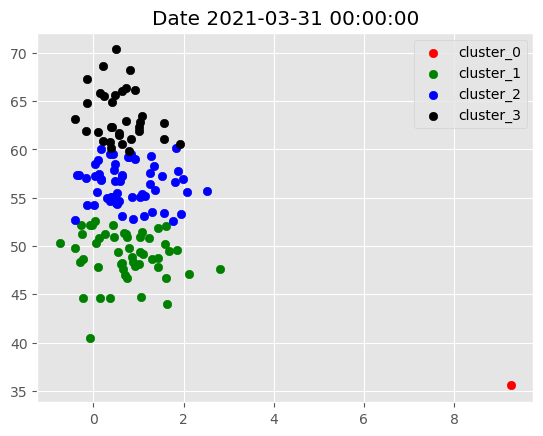

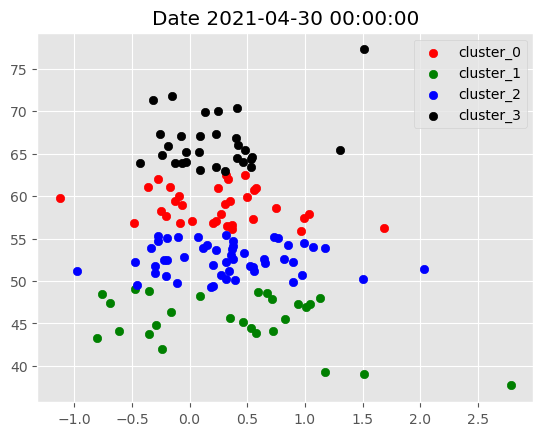

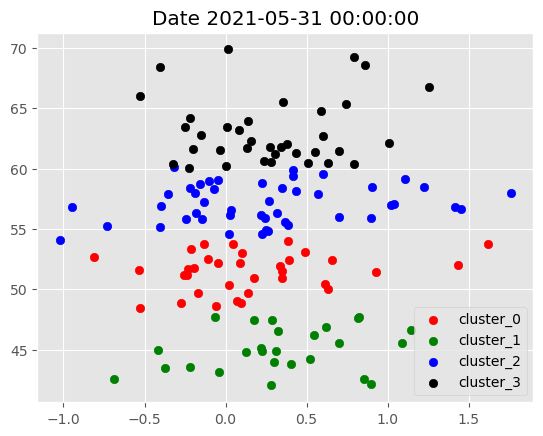

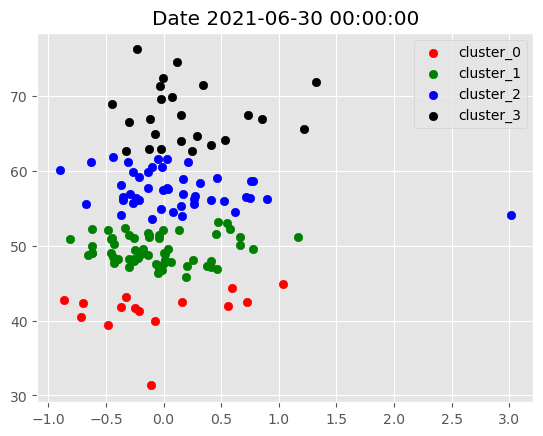

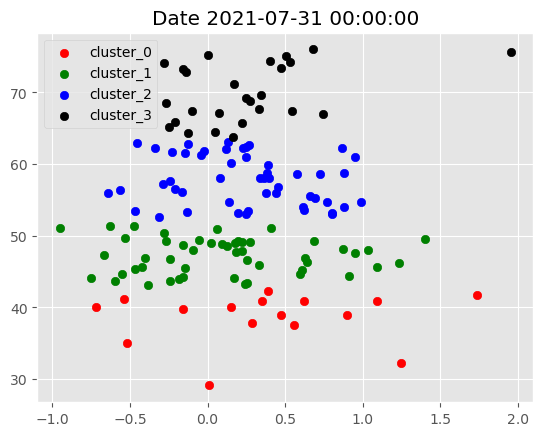

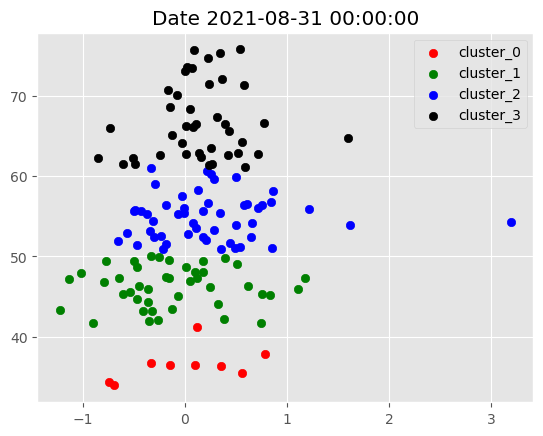

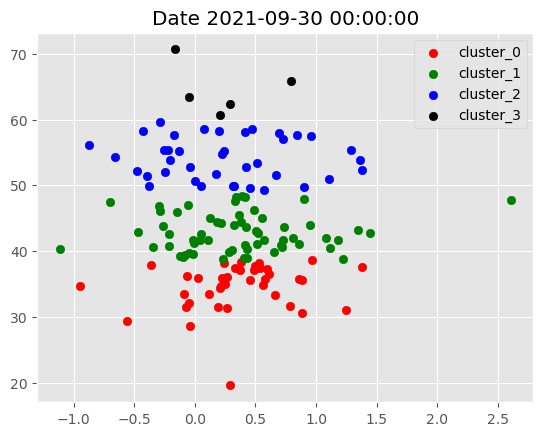

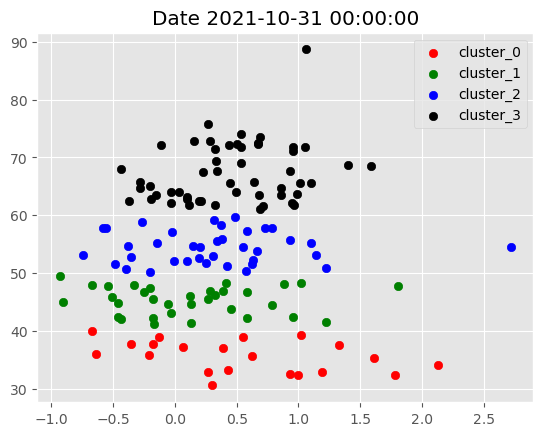

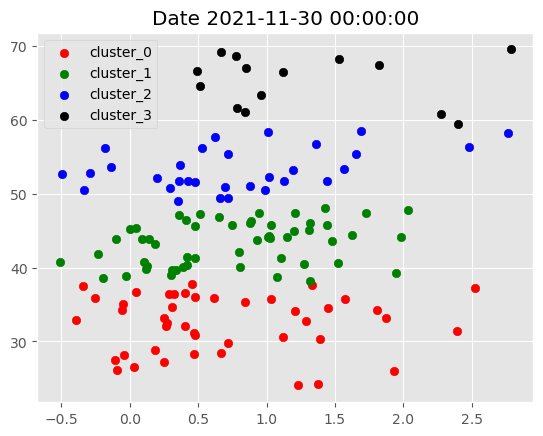

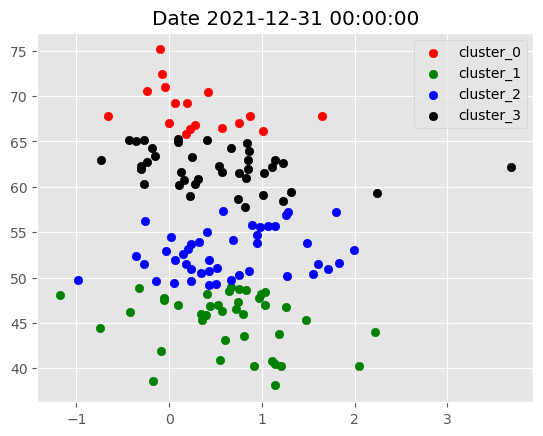

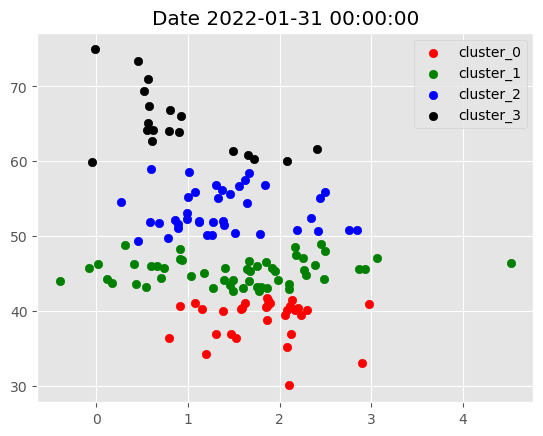

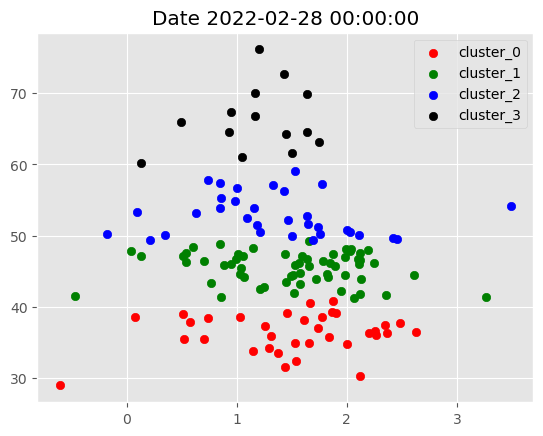

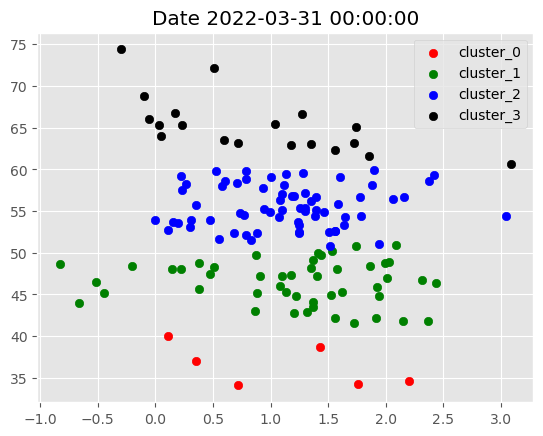

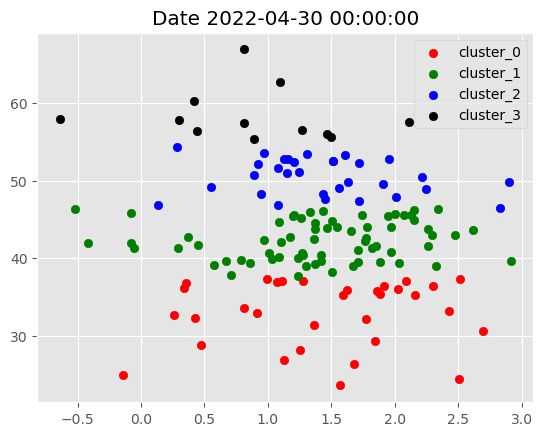

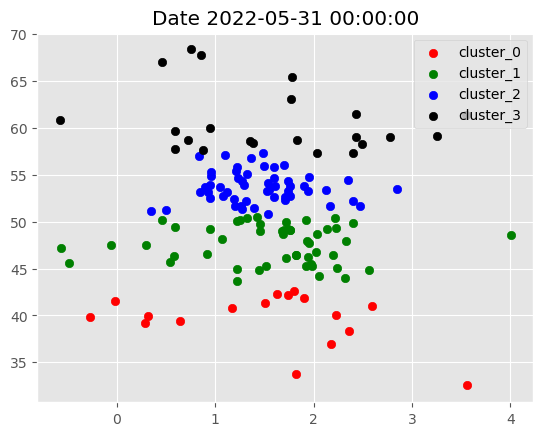

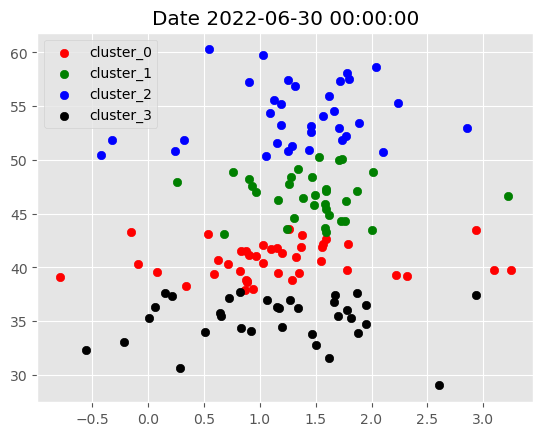

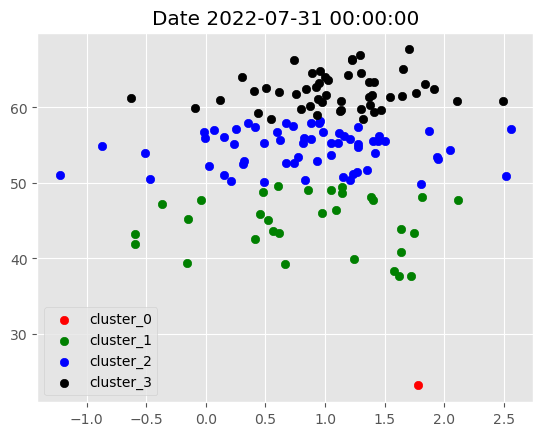

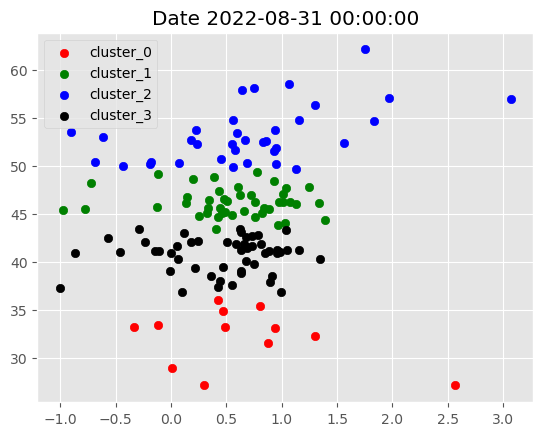

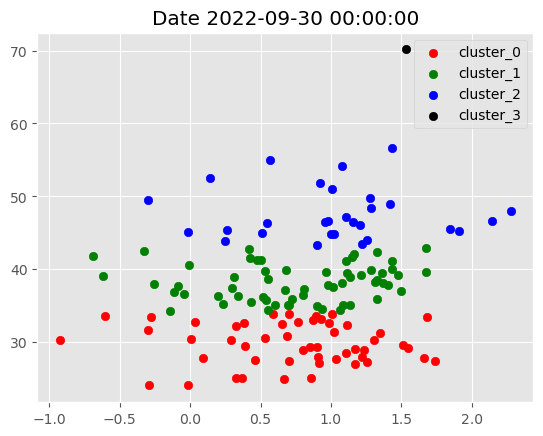

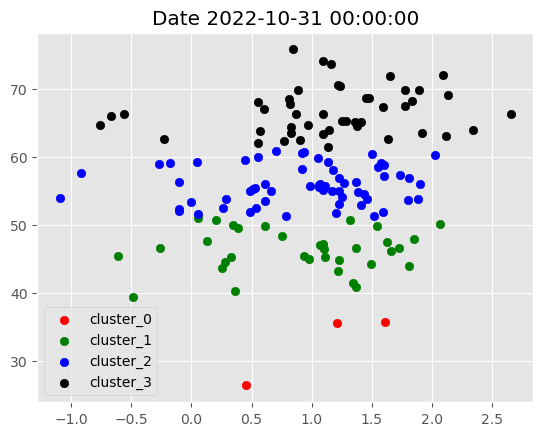

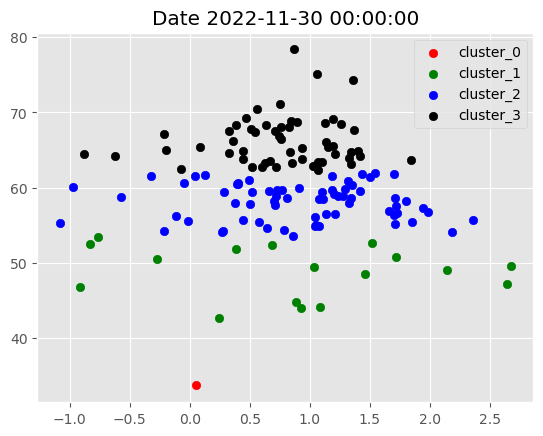

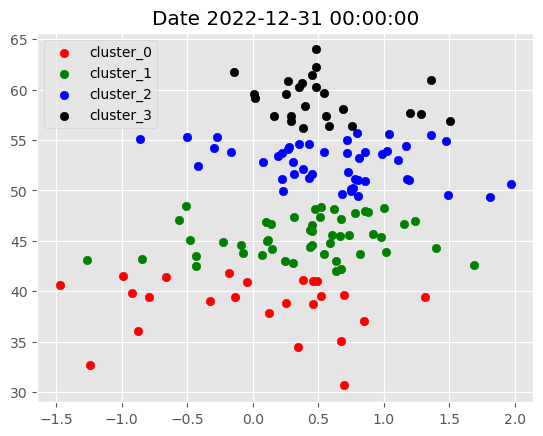

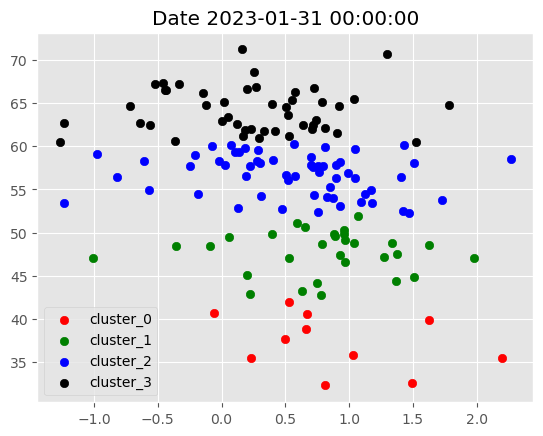

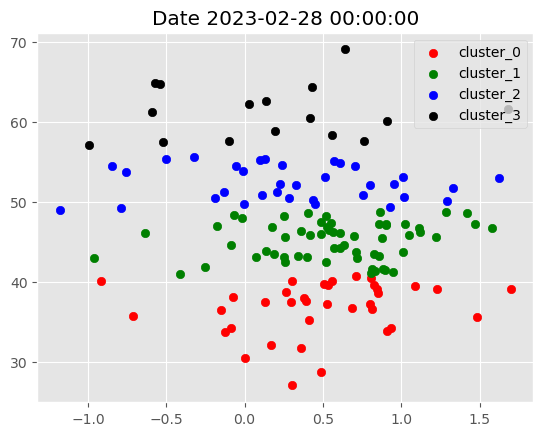

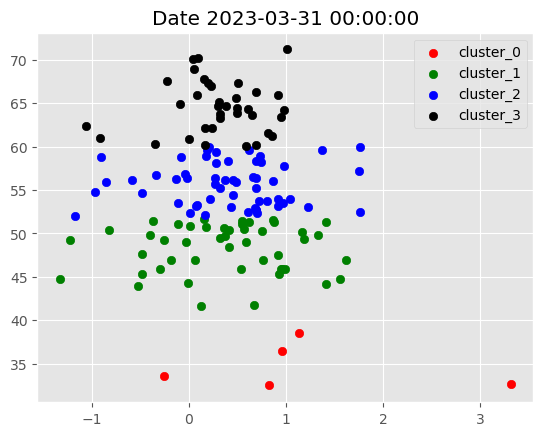

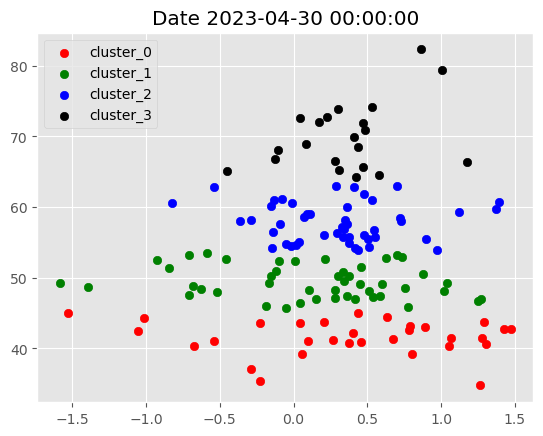

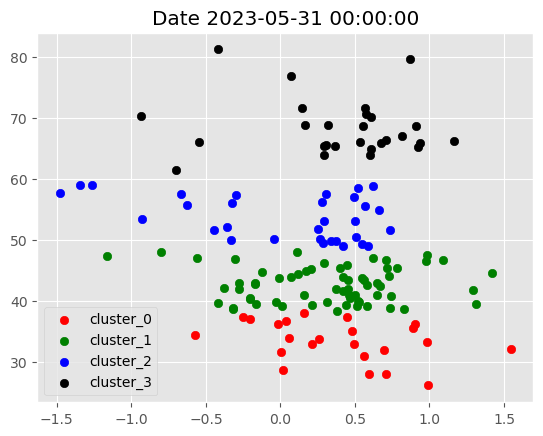

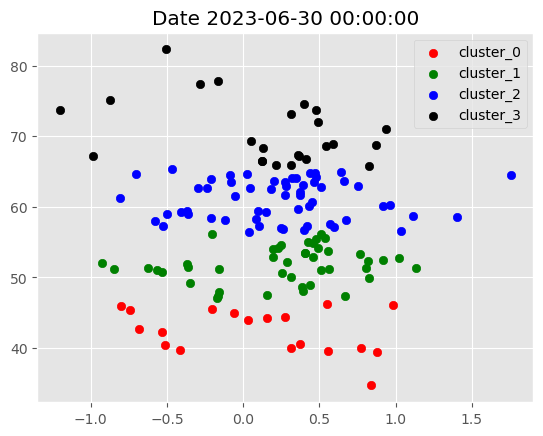

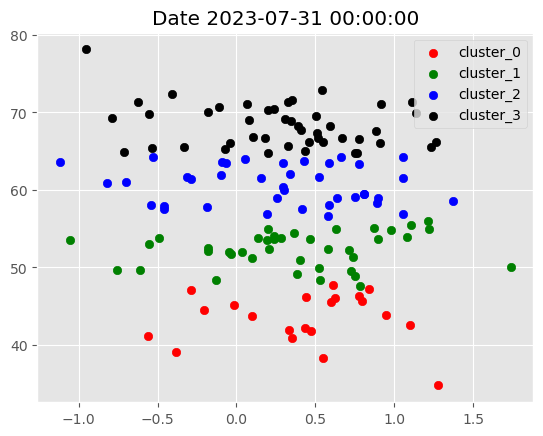

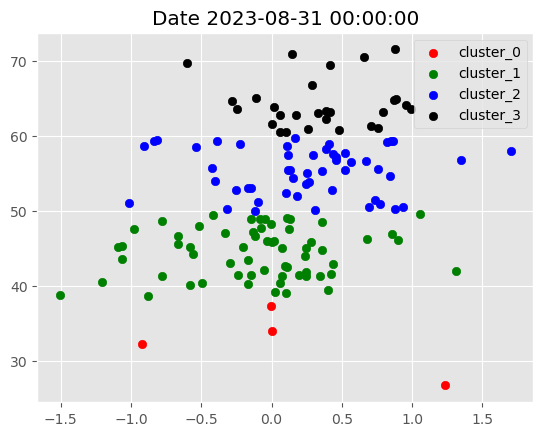

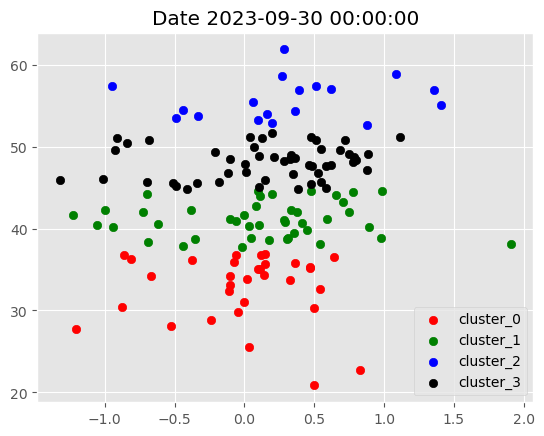

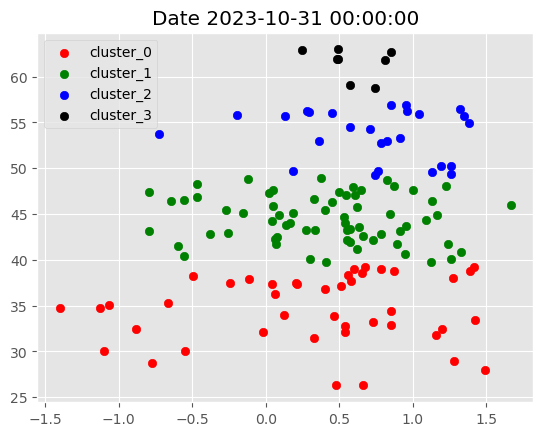

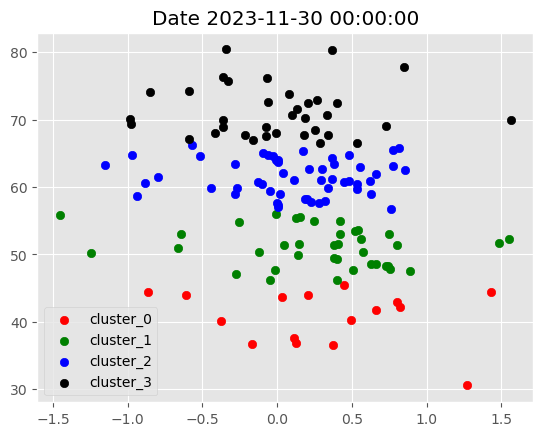

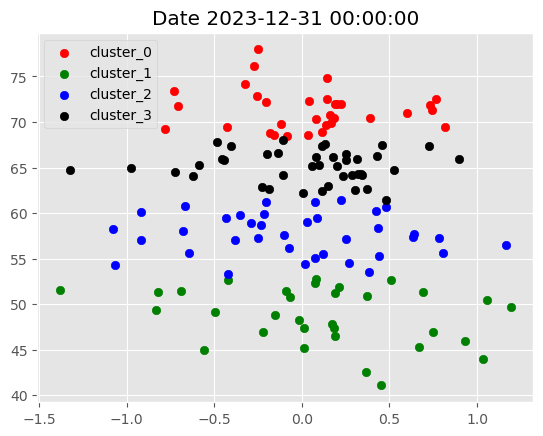

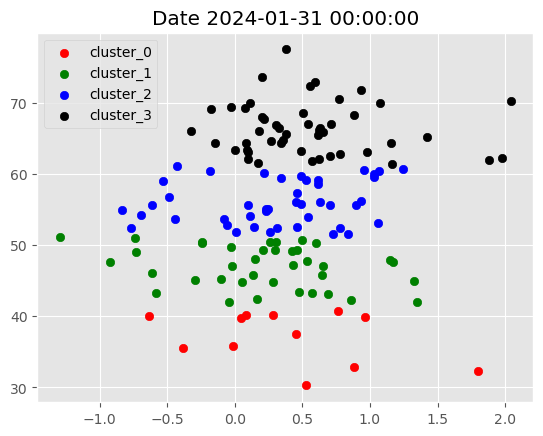

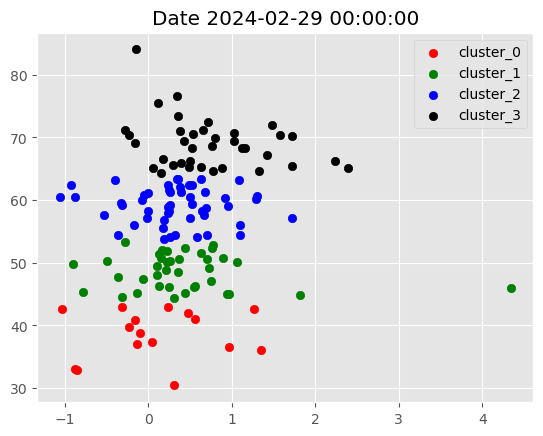

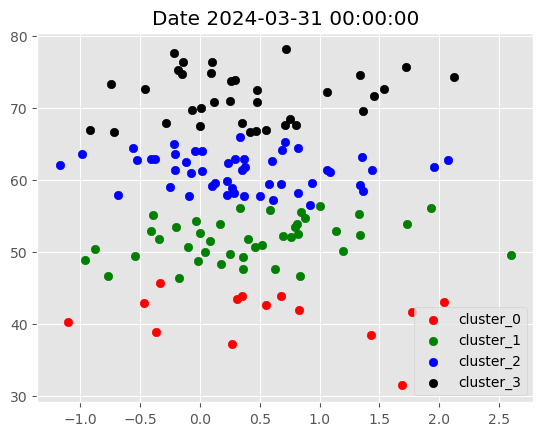

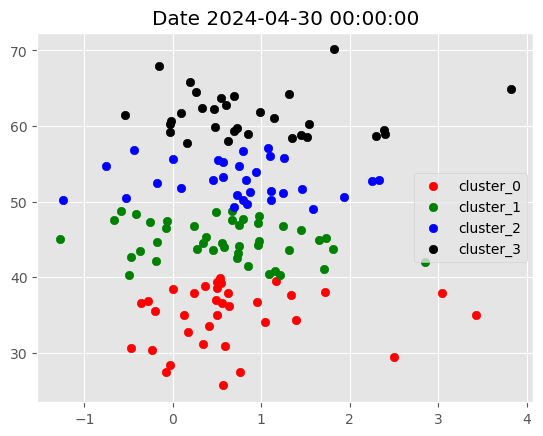

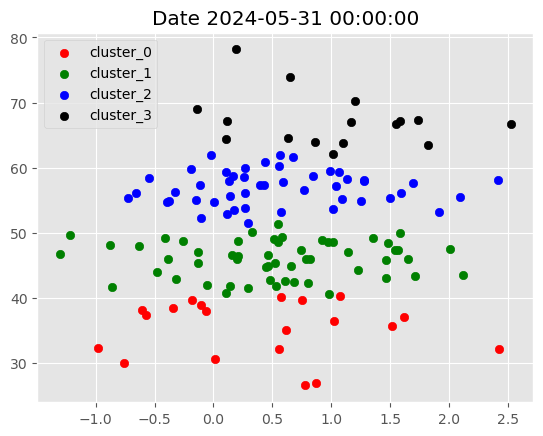

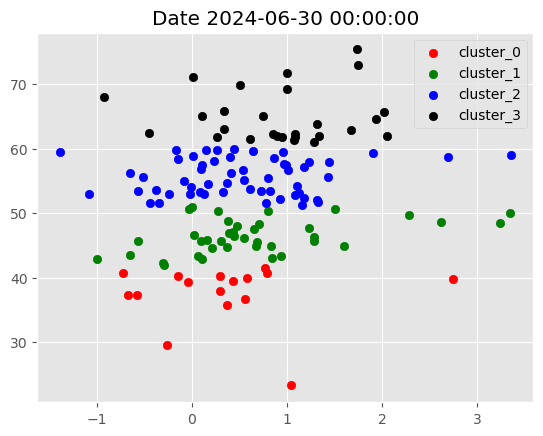

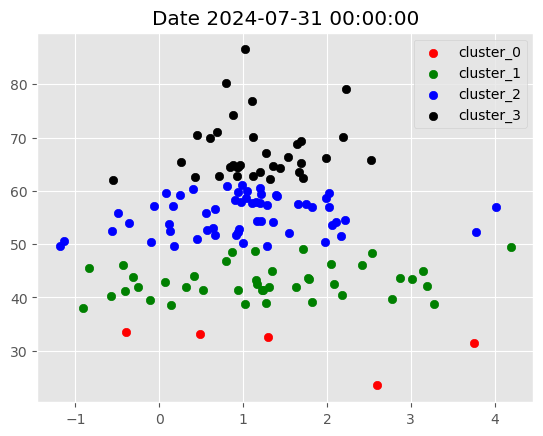

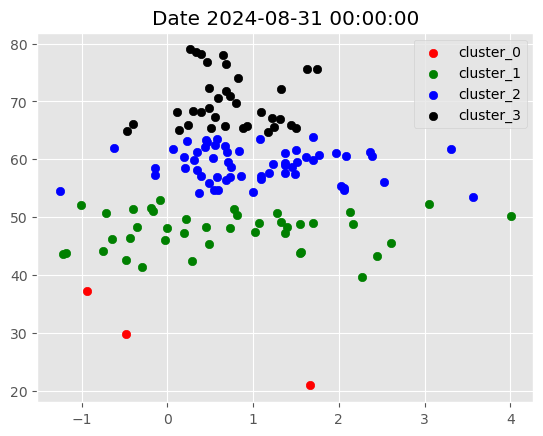

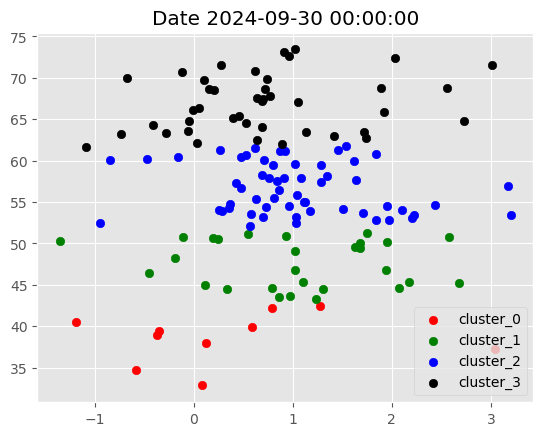

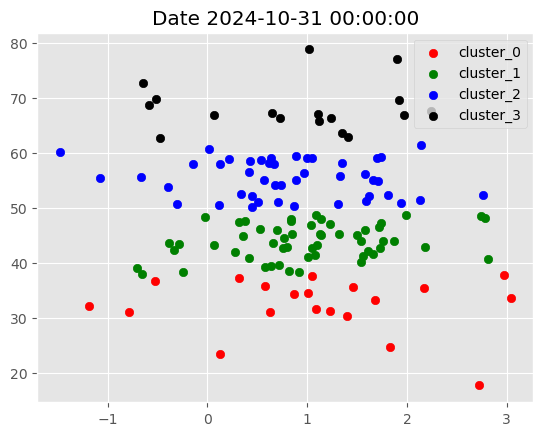

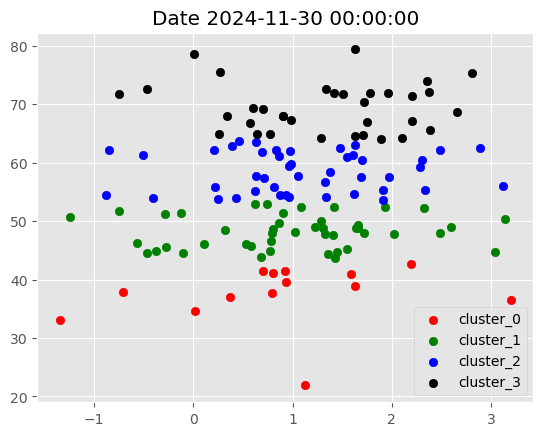

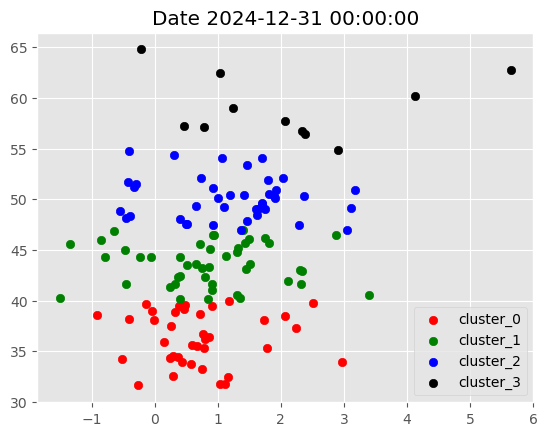

In [50]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g =  data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_cluster(g)

# Pre-defined centroids

In [47]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:,1] = target_rsi_values

initial_centroids 

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [51]:
filtered_df = data[data['cluster']==3].copy()

filtered_df

garman_klass        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                          
2017-01-31 AAPL        0.000019  67.547781  3.325405  3.353906  3.382406   
           ABT         0.000172  66.811051  3.548355  3.581633  3.614911   
           ADBE        0.000042  65.319514  4.650383  4.706909  4.763434   
           AVGO        0.000077  66.048037  2.640380  2.745512  2.850645   
           BAX         0.000247  64.773208  3.682097  3.715991  3.749886   
...                         ...        ...       ...       ...       ...   
2024-12-31 LULU        0.000119  62.480087  5.847087  5.944703  6.042318   
           PLTR        0.001381  60.203922  4.235809  4.334534  4.433260   
           TSLA        0.000972  54.834329  5.871360  6.036659  6.201958   
           UAL         0.000240  57.723337  4.537571  4.590579  4.643586   
           V           0.000030  57.096535  5.728009  5.751046  5.774083   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-01-31 AAPL   -1.158978 -0.114670   0.047747   0.047851   0.024169   
           ABT    -1.146275  0.227036   0.094502   0.050846   0.023240   
           ADBE   -1.216330  0.124432   0.101311   0.050148   0.017878   
           AVGO   -0.613211  0.007750   0.128585   0.084825   0.056213   
           BAX    -0.823039  0.490106   0.080514   0.039126   0.003208   
...                     ...       ...        ...        ...        ...   
2024-12-31 LULU    1.033504  1.768792   0.192572   0.132999   0.121157   
           PLTR    4.132338  2.954790   0.127460   0.348992   0.266826   
           TSLA    2.905050  3.044508   0.170008   0.271350   0.155688   
           UAL     2.060060  1.127236   0.002788   0.113883   0.193885   
           V       0.777033  1.051433   0.003047   0.045194   0.048185   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-01-31 AAPL     0.027504   0.030998    0.020412  1.161875 -0.129929   
           ABT     -0.009313   0.010061    0.010349  0.830648 -0.181045   
           ADBE     0.024838   0.020781    0.020257  1.158395 -0.414237   
           AVGO     0.036838   0.036861    0.035215  0.906826  0.185314   
           BAX      0.000565   0.009921    0.023681  1.153635 -0.426844   
...                      ...        ...         ...       ...       ...   
2024-12-31 LULU     0.042035  -0.002366   -0.023913  1.118439 -0.396183   
           PLTR     0.199987   0.137886    0.128524  0.214218 -0.047583   
           TSLA     0.126249   0.096819    0.041301  0.919430  2.757638   
           UAL      0.113936   0.081729    0.073926  0.836122  0.853555   
           V        0.032111   0.014563    0.016930  0.882152 -0.142211   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-01-31 AAPL   -0.610151  0.610248  0.003654        3  
           ABT    -0.474214  0.097109  0.979774        3  
           ADBE   -0.138100 -0.198399 -0.820309        3  
           AVGO   -0.486721  0.253945 -0.031378        3  
           BAX    -1.091945 -1.203701  0.127545        3  
...                     ...       ...       ...      ...  
2024-12-31 LULU   -0.594619 -0.636493  1.376690        3  
           PLTR   -1.408249 -7.199369 -4.099010        3  
           TSLA   -1.243186 -0.598735 -3.394104        3  
           UAL    -0.884297 -2.415174  0.116292        3  
           V       0.004366 -0.066007  0.225609        3  

[2713 rows x 19 columns]

In [52]:
filtered_df = filtered_df.reset_index(level=1)

filtered_df

ticker  garman_klass        rsi    bb_low    bb_mid   bb_high  \
date                                                                       
2017-01-31   AAPL      0.000019  67.547781  3.325405  3.353906  3.382406   
2017-01-31    ABT      0.000172  66.811051  3.548355  3.581633  3.614911   
2017-01-31   ADBE      0.000042  65.319514  4.650383  4.706909  4.763434   
2017-01-31   AVGO      0.000077  66.048037  2.640380  2.745512  2.850645   
2017-01-31    BAX      0.000247  64.773208  3.682097  3.715991  3.749886   
...           ...           ...        ...       ...       ...       ...   
2024-12-31   LULU      0.000119  62.480087  5.847087  5.944703  6.042318   
2024-12-31   PLTR      0.001381  60.203922  4.235809  4.334534  4.433260   
2024-12-31   TSLA      0.000972  54.834329  5.871360  6.036659  6.201958   
2024-12-31    UAL      0.000240  57.723337  4.537571  4.590579  4.643586   
2024-12-31      V      0.000030  57.096535  5.728009  5.751046  5.774083   

                 atr      macd  return_1m  return_2m  return_3m  return_6m  \
date                                                                         
2017-01-31 -1.158978 -0.114670   0.047747   0.047851   0.024169   0.027504   
2017-01-31 -1.146275  0.227036   0.094502   0.050846   0.023240  -0.009313   
2017-01-31 -1.216330  0.124432   0.101311   0.050148   0.017878   0.024838   
2017-01-31 -0.613211  0.007750   0.128585   0.084825   0.056213   0.036838   
2017-01-31 -0.823039  0.490106   0.080514   0.039126   0.003208   0.000565   
...              ...       ...        ...        ...        ...        ...   
2024-12-31  1.033504  1.768792   0.192572   0.132999   0.121157   0.042035   
2024-12-31  4.132338  2.954790   0.127460   0.348992   0.266826   0.199987   
2024-12-31  2.905050  3.044508   0.170008   0.271350   0.155688   0.126249   
2024-12-31  2.060060  1.127236   0.002788   0.113883   0.193885   0.113936   
2024-12-31  0.777033  1.051433   0.003047   0.045194   0.048185   0.032111   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2017-01-31   0.030998    0.020412  1.161875 -0.129929 -0.610151  0.610248   
2017-01-31   0.010061    0.010349  0.830648 -0.181045 -0.474214  0.097109   
2017-01-31   0.020781    0.020257  1.158395 -0.414237 -0.138100 -0.198399   
2017-01-31   0.036861    0.035215  0.906826  0.185314 -0.486721  0.253945   
2017-01-31   0.009921    0.023681  1.153635 -0.426844 -1.091945 -1.203701   
...               ...         ...       ...       ...       ...       ...   
2024-12-31  -0.002366   -0.023913  1.118439 -0.396183 -0.594619 -0.636493   
2024-12-31   0.137886    0.128524  0.214218 -0.047583 -1.408249 -7.199369   
2024-12-31   0.096819    0.041301  0.919430  2.757638 -1.243186 -0.598735   
2024-12-31   0.081729    0.073926  0.836122  0.853555 -0.884297 -2.415174   
2024-12-31   0.014563    0.016930  0.882152 -0.142211  0.004366 -0.066007   

                 CMA  cluster  
date                           
2017-01-31  0.003654        3  
2017-01-31  0.979774        3  
2017-01-31 -0.820309        3  
2017-01-31 -0.031378        3  
2017-01-31  0.127545        3  
...              ...      ...  
2024-12-31  1.376690        3  
2024-12-31 -4.099010        3  
2024-12-31 -3.394104        3  
2024-12-31  0.116292        3  
2024-12-31  0.225609        3  

[2713 rows x 20 columns]

In [53]:
filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df

ticker  garman_klass        rsi    bb_low    bb_mid   bb_high  \
date                                                                       
2017-02-01   AAPL      0.000019  67.547781  3.325405  3.353906  3.382406   
2017-02-01    ABT      0.000172  66.811051  3.548355  3.581633  3.614911   
2017-02-01   ADBE      0.000042  65.319514  4.650383  4.706909  4.763434   
2017-02-01   AVGO      0.000077  66.048037  2.640380  2.745512  2.850645   
2017-02-01    BAX      0.000247  64.773208  3.682097  3.715991  3.749886   
...           ...           ...        ...       ...       ...       ...   
2025-01-01   LULU      0.000119  62.480087  5.847087  5.944703  6.042318   
2025-01-01   PLTR      0.001381  60.203922  4.235809  4.334534  4.433260   
2025-01-01   TSLA      0.000972  54.834329  5.871360  6.036659  6.201958   
2025-01-01    UAL      0.000240  57.723337  4.537571  4.590579  4.643586   
2025-01-01      V      0.000030  57.096535  5.728009  5.751046  5.774083   

                 atr      macd  return_1m  return_2m  return_3m  return_6m  \
date                                                                         
2017-02-01 -1.158978 -0.114670   0.047747   0.047851   0.024169   0.027504   
2017-02-01 -1.146275  0.227036   0.094502   0.050846   0.023240  -0.009313   
2017-02-01 -1.216330  0.124432   0.101311   0.050148   0.017878   0.024838   
2017-02-01 -0.613211  0.007750   0.128585   0.084825   0.056213   0.036838   
2017-02-01 -0.823039  0.490106   0.080514   0.039126   0.003208   0.000565   
...              ...       ...        ...        ...        ...        ...   
2025-01-01  1.033504  1.768792   0.192572   0.132999   0.121157   0.042035   
2025-01-01  4.132338  2.954790   0.127460   0.348992   0.266826   0.199987   
2025-01-01  2.905050  3.044508   0.170008   0.271350   0.155688   0.126249   
2025-01-01  2.060060  1.127236   0.002788   0.113883   0.193885   0.113936   
2025-01-01  0.777033  1.051433   0.003047   0.045194   0.048185   0.032111   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
date                                                                        
2017-02-01   0.030998    0.020412  1.161875 -0.129929 -0.610151  0.610248   
2017-02-01   0.010061    0.010349  0.830648 -0.181045 -0.474214  0.097109   
2017-02-01   0.020781    0.020257  1.158395 -0.414237 -0.138100 -0.198399   
2017-02-01   0.036861    0.035215  0.906826  0.185314 -0.486721  0.253945   
2017-02-01   0.009921    0.023681  1.153635 -0.426844 -1.091945 -1.203701   
...               ...         ...       ...       ...       ...       ...   
2025-01-01  -0.002366   -0.023913  1.118439 -0.396183 -0.594619 -0.636493   
2025-01-01   0.137886    0.128524  0.214218 -0.047583 -1.408249 -7.199369   
2025-01-01   0.096819    0.041301  0.919430  2.757638 -1.243186 -0.598735   
2025-01-01   0.081729    0.073926  0.836122  0.853555 -0.884297 -2.415174   
2025-01-01   0.014563    0.016930  0.882152 -0.142211  0.004366 -0.066007   

                 CMA  cluster  
date                           
2017-02-01  0.003654        3  
2017-02-01  0.979774        3  
2017-02-01 -0.820309        3  
2017-02-01 -0.031378        3  
2017-02-01  0.127545        3  
...              ...      ...  
2025-01-01  1.376690        3  
2025-01-01 -4.099010        3  
2025-01-01 -3.394104        3  
2025-01-01  0.116292        3  
2025-01-01  0.225609        3  

[2713 rows x 20 columns]

In [54]:
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

In [55]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_date = {}

for d in dates:
    fixed_date[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_date

{'2017-02-01': ['AAPL',
  'ABT',
  'ADBE',
  'AVGO',
  'BAX',
  'CHTR',
  'CMCSA',
  'CRM',
  'CSX',
  'DIS',
  'ELV',
  'MO',
  'MU',
  'NEE',
  'NFLX',
  'PANW',
  'PM',
  'SHW',
  'SWKS',
  'TSLA',
  'WDC'],
 '2017-03-01': ['AAPL',
  'ABT',
  'AMGN',
  'BA',
  'BAX',
  'BKNG',
  'BRK-B',
  'COST',
  'CSCO',
  'HCA',
  'HD',
  'HON',
  'JNJ',
  'LLY',
  'MCD',
  'MDT',
  'MMM',
  'MO',
  'NEE',
  'NXPI',
  'ORCL',
  'PEP',
  'PFE',
  'PM',
  'V'],
 '2017-04-01': ['AAPL',
  'ADBE',
  'AMAT',
  'AMZN',
  'BKNG',
  'CCL',
  'CMG',
  'DIS',
  'LVS',
  'MAR',
  'MCD',
  'META',
  'MMM',
  'MU',
  'NFLX',
  'ORCL',
  'PARA',
  'PEP',
  'PM',
  'SBUX',
  'TSLA',
  'VRTX',
  'WDC',
  'WMT',
  'WYNN'],
 '2017-05-01': ['ABBV',
  'ADBE',
  'AMAT',
  'AMZN',
  'BA',
  'BAX',
  'BKNG',
  'BSX',
  'CAT',
  'CCL',
  'CHTR',
  'CMCSA',
  'CMG',
  'COST',
  'CRM',
  'CSCO',
  'CSX',
  'CVS',
  'DIS',
  'DLTR',
  'EA',
  'ELV',
  'EXPE',
  'GOOG',
  'GOOGL',
  'HD',
  'HON',
  'HUM',
  'LOW',
  'LVS',

# PORTFOLIO

In [56]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [57]:
def optimize_weights(prices, lower_bound):
    returns = expected_returns.mean_historical_return(prices=prices, 
                                                      frequency=252)
    cov = risk_models.sample_cov(prices=prices, 
                                 frequency=252)
    ef = EfficientFrontier(expected_returns=returns, 
                           cov_matrix=cov, 
                           weight_bounds=(lower_bound, .1), 
                           solver='SCS' 
                           )
    weights = ef.max_sharpe()

    return ef.clean_weights()

In [75]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks, 
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12), 
                     end=data.index.get_level_values('date').unique()[-1])
new_df

[*********************100%***********************]  168 of 168 completed


Price            Close                                                  \
Ticker            AAPL        ABBV        ABNB         ABT         ACN   
Date                                                                     
2016-02-01   21.787745   36.840183         NaN   32.336609   91.197510   
2016-02-02   21.347157   36.542145         NaN   31.857237   89.086617   
2016-02-03   21.769665   38.499630         NaN   31.974977   87.610680   
2016-02-04   21.944584   38.445465         NaN   31.966560   88.151291   
2016-02-05   21.358496   35.979973         NaN   31.461954   84.924889   
...                ...         ...         ...         ...         ...   
2024-12-23  254.655716  175.105225  134.520004  113.188950  355.488953   
2024-12-24  257.578674  176.685577  134.990005  113.634544  358.322815   
2024-12-26  258.396667  175.900314  135.320007  114.139534  357.133789   
2024-12-27  254.974930  174.732224  133.384995  113.862282  352.922638   
2024-12-30  251.593079  172.955551  131.809998  111.693764  349.266388   

Price                                                                  ...  \
Ticker            ADBE         ADI         ADP        ADSK        AIG  ...   
Date                                                                   ...   
2016-02-01   89.610001   43.959320   67.687767   47.650002  44.304337  ...   
2016-02-02   87.949997   42.446346   67.035110   45.889999  43.548748  ...   
2016-02-03   87.989998   42.479412   67.018806   49.560001  42.745945  ...   
2016-02-04   86.360001   42.719170   67.549057   49.509998  42.517696  ...   
2016-02-05   79.199997   41.189644   66.333504   46.169998  42.006104  ...   
...                ...         ...         ...         ...        ...  ...   
2024-12-23  446.739990  212.989349  291.136230  297.489990  71.743034  ...   
2024-12-24  447.940002  216.161057  293.422546  301.230011  72.109322  ...   
2024-12-26  450.160004  216.131317  294.184692  300.279999  72.604301  ...   
2024-12-27  446.480011  215.070786  293.145416  297.589996  72.267723  ...   
2024-12-30  445.799988  210.679977  289.968323  297.529999  71.822235  ...   

Price        Volume                                                           \
Ticker         VRTX     VTRS        VZ       WBA     WDAY      WDC       WFC   
Date                                                                           
2016-02-01  2913200  5205500  28536600   4964100  2295300  8492602  17385400   
2016-02-02  3142900  5163500  21607000   4313200  2709200  4844032  25593200   
2016-02-03  3256700  5683100  20309800   4465400  1749000  5388447  47149700   
2016-02-04  2453000  4032500  19594300   5420900  1839000  8439946  30851700   
2016-02-05  4571300  4300600  25790300   6224200  8495600  6925244  23733700   
...             ...      ...       ...       ...      ...      ...       ...   
2024-12-23  2204300  8585200  21292300  18506100  3676000  5439118  11817000   
2024-12-24  1468600  4059600  11712200   8724500   850500  2000508   4442700   
2024-12-26  1191500  6194700  12946400  15705800  1243900  2839158   6964300   
2024-12-27  1373400  5182600  15168100  11621000  1602800  5506061   7219500   
2024-12-30  1456000  5822900  15672000  13992700  1755600  5834562   8443800   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2016-02-01  44185200  3953100  16754200  
2016-02-02  40757700  5434300  21404200  
2016-02-03  36946800  4244300  25873700  
2016-02-04  38500200  3671400  23658700  
2016-02-05  42589500  2462100  26719900  
...              ...      ...       ...  
2024-12-23  26205400  1312400  12285100  
2024-12-24   8992400   692800   7807000  
2024-12-26  10994000  1218900   9652400  
2024-12-27  11384400  1086700  11943900  
2024-12-30   9790200  2180100  11080800  

[2244 rows x 840 columns]

In [76]:
returns_dataframe = np.log(new_df['Close']).diff()

returns_dataframe

Ticker          AAPL      ABBV      ABNB       ABT       ACN      ADBE  \
Date                                                                     
2016-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2016-02-02 -0.020429 -0.008123       NaN -0.014935 -0.023418 -0.018698   
2016-02-03  0.019599  0.052182       NaN  0.003689 -0.016706  0.000455   
2016-02-04  0.008003 -0.001408       NaN -0.000263  0.006152 -0.018699   
2016-02-05 -0.027071 -0.066278       NaN -0.015911 -0.037287 -0.086548   
...              ...       ...       ...       ...       ...       ...   
2024-12-23  0.003060  0.015877  0.002307  0.000700 -0.020962 -0.000962   
2024-12-24  0.011413  0.008985  0.003488  0.003929  0.007940  0.002683   
2024-12-26  0.003171 -0.004454  0.002442  0.004434 -0.003324  0.004944   
2024-12-27 -0.013331 -0.006663 -0.014403 -0.002432 -0.011862 -0.008208   
2024-12-30 -0.013352 -0.010220 -0.011878 -0.019229 -0.010414 -0.001524   

Ticker           ADI       ADP      ADSK       AIG  ...      VRTX      VTRS  \
Date                                                ...                       
2016-02-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2016-02-02 -0.035024 -0.009689 -0.037635 -0.017202  ... -0.015379 -0.029662   
2016-02-03  0.000779 -0.000243  0.076937 -0.018607  ...  0.031378  0.027941   
2016-02-04  0.005628  0.007881 -0.001009 -0.005354  ... -0.023277  0.000956   
2016-02-05 -0.036461 -0.018159 -0.069844 -0.012105  ... -0.057325 -0.017744   
...              ...       ...       ...       ...  ...       ...       ...   
2024-12-23  0.014578  0.000442 -0.002115 -0.003031  ...  0.019937 -0.002399   
2024-12-24  0.014782  0.007822  0.012494  0.005093  ...  0.007155 -0.007232   
2024-12-26 -0.000138  0.002594 -0.003159  0.006841  ...  0.006033  0.012821   
2024-12-27 -0.004919 -0.003539 -0.008999 -0.004647  ... -0.004613 -0.006390   
2024-12-30 -0.020627 -0.010897 -0.000202 -0.006183  ... -0.023290 -0.008045   

Ticker            VZ       WBA      WDAY       WDC       WFC       WMT  \
Date                                                                     
2016-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2016-02-02 -0.016887 -0.026193 -0.048181 -0.047886 -0.022478 -0.009526   
2016-02-03  0.014125 -0.015374  0.020345  0.024230 -0.017803 -0.008864   
2016-02-04 -0.003760  0.004935  0.027836  0.022639  0.013563  0.002261   
2016-02-05  0.010651 -0.026119 -0.178504 -0.069080 -0.008116  0.008695   
...              ...       ...       ...       ...       ...       ...   
2024-12-23  0.000250 -0.026527 -0.028418  0.021676  0.002839 -0.020703   
2024-12-24 -0.003511 -0.011899  0.013660  0.002272  0.014775  0.025462   
2024-12-26  0.004012  0.051946  0.001263  0.000162  0.002372  0.001186   
2024-12-27 -0.001002 -0.006218 -0.011725 -0.016502 -0.009099 -0.012253   
2024-12-30 -0.008048 -0.038140 -0.016054 -0.017953 -0.009893 -0.011963   

Ticker          WYNN       XOM  
Date                            
2016-02-01       NaN       NaN  
2016-02-02 -0.079050 -0.022536  
2016-02-03  0.018695  0.050838  
2016-02-04  0.009610  0.017055  
2016-02-05 -0.029758  0.003127  
...              ...       ...  
2024-12-23 -0.009488  0.004053  
2024-12-24  0.007575  0.000940  
2024-12-26  0.005952  0.000845  
2024-12-27 -0.007079 -0.000094  
2024-12-30 -0.032666 -0.006785  

[2244 rows x 168 columns]

In [146]:
portfolio_df = pd.DataFrame()

for start_date in fixed_date.keys():

    try:
        
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        
        cols = fixed_date[start_date]
        
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date].xs('Close', axis=1, level='Price')[cols]

        success = False
        try:
            
            weights = optimize_weights(prices=optimization_df, 
                                       lower_bound=round(1/(len(optimization_df.columns)*2), 3))
        
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max sharpe optimization failed for {start_date}, con. with equal weights')

        if success==True:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))], 
                                     index=optimization_df.columns.tolist(), 
                                     columns=pd.Series(0)).T
    
        temp_df = returns_dataframe[start_date:end_date]
    
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
           .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True), 
                  left_index=True, 
                  right_index=True)\
           .reset_index().set_index(['Date', 'Ticker']).unstack().stack()
    
        temp_df.index.names = ['date', 'ticker']
    
        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
    
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max sharpe optimization failed for 2018-05-01, con. with equal weights
Max sharpe optimization failed for 2020-03-01, con. with equal weights
Max sharpe optimization failed for 2020-04-01, con. with equal weights
Max sharpe optimization failed for 2021-02-01, con. with equal weights
Max sharpe optimization failed for 2021-10-01, con. with equal weights
Max sharpe optimization failed for 2022-07-01, con. with equal weights
Max sharpe optimization failed for 2022-09-01, con. with equal weights
Max sharpe optimization failed for 2022-10-01, con. with equal weights
Max sharpe optimization failed for 2023-11-01, con. with equal weights
'return'


Strategy Return
date                       
2017-02-01         0.007794
2017-02-02        -0.000426
2017-02-03         0.006917
2017-02-06        -0.003384
2017-02-07         0.006023
...                     ...
2024-12-23         0.000309
2024-12-24         0.013489
2024-12-26         0.000843
2024-12-27        -0.011474
2024-12-30        -0.010093

[1991 rows x 1 columns]

# Comparing AP500 to Strategy

In [162]:
# spy = yf.download(tickers='SPY', 
#                   start='2015-01-01', 
#                   end=dt.date.today())
spy_ret = np.log(spy[['Close']]).diff().dropna().rename({'Close':'SPY B&H'}, axis=1)
spy_ret.columns = ['SPY B&H']  # Flatten the multi-index to a single label

portfolio_df = portfolio_df.merge(spy_ret, 
                                  left_index=True, 
                                  right_index=True)

portfolio_df

Strategy Return   SPY B&H
2017-02-01         0.007794  0.000396
2017-02-02        -0.000426  0.000659
2017-02-03         0.006917  0.006869
2017-02-06        -0.003384 -0.001789
2017-02-07         0.006023  0.000043
...                     ...       ...
2024-12-23         0.000309  0.005970
2024-12-24         0.013489  0.011054
2024-12-26         0.000843  0.000067
2024-12-27        -0.011474 -0.010582
2024-12-30        -0.010093 -0.011477

[1991 rows x 2 columns]

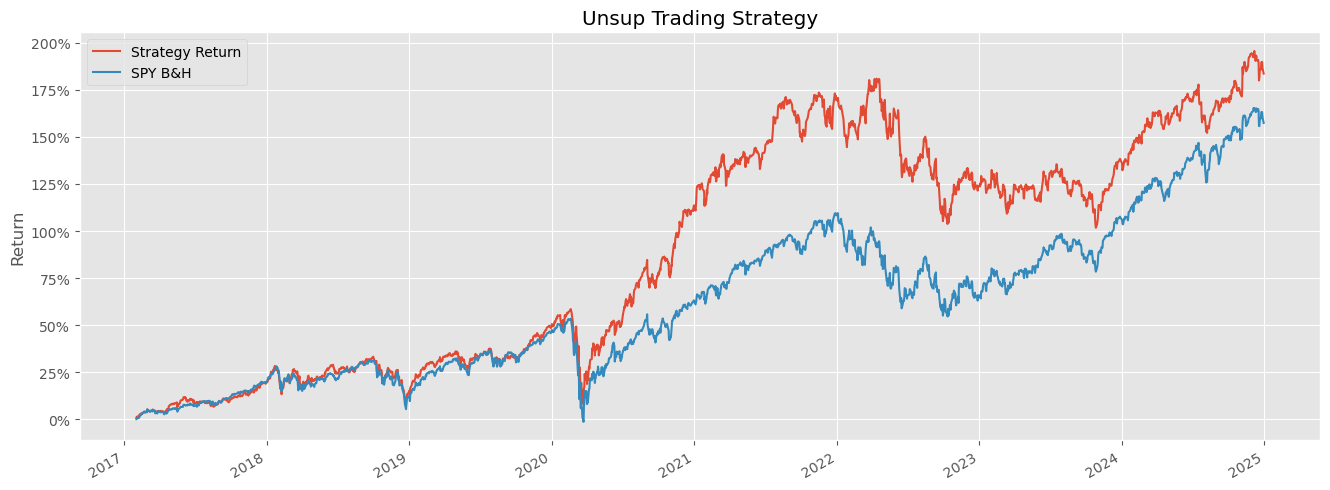

In [168]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_ret = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_ret[:'2024-12-30'].plot(figsize=(16,6))

plt.title('Unsup Trading Strategy')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()